# 1. Setup and Get Data

### 1.1 Install Dependencies and Setup

In [1]:
!pip3 install labelme tensorflow  opencv-python matplotlib albumentations


In [2]:
!pip install labelme

### 1.2 Collect Images Using OpenCV

In [3]:
!pip3 install tensorflow

In [4]:
import os
import time
import uuid
import cv2

In [5]:
pip install opencv_python

In [6]:
IMAGES_PATH = os.path.join('data','images')
number_images = 30

In [10]:
import cv2
import os
import uuid
import time

# Create a directory to save images
IMAGES_PATH = os.path.join('data','images')
os.makedirs(IMAGES_PATH, exist_ok=True)

# Initialize the camera
cap = cv2.VideoCapture(0)  # Use camera index 0 (usually the default camera)

# Check if the camera is opened successfully
if not cap.isOpened():
    print("Error: Failed to open camera.")
    exit()

# Define the number of images to capture
number_images = 30

# Capture and save images
for imgnum in range(number_images):
    print('Collecting image {}'.format(imgnum))
    
    # Capture a frame from the camera
    ret, frame = cap.read()
    
    # Check if the frame is captured successfully
    if not ret:
        print("Error: Failed to capture frame.")
        break
    
    # Generate a unique image name using UUID
    imgname = os.path.join(IMAGES_PATH, f'{str(uuid.uuid1())}.jpg')
    
    # Save the captured frame as an image
    cv2.imwrite(imgname, frame)
    print("Image saved:", imgname)
    
    # Display the captured frame
    cv2.imshow('frame', frame)
    
    # Wait for a short duration
    time.sleep(0.5)
    
    # Check for the 'q' key to quit capturing images
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# Release the camera and close all OpenCV windows
cap.release()
cv2.destroyAllWindows()


Image saved: data\images\1ac4b825-ff0b-11ee-96f3-00e93ad23ed8.jpg
Image saved: data\images\1b1cf4f5-ff0b-11ee-8afb-00e93ad23ed8.jpg
Image saved: data\images\1b6d532c-ff0b-11ee-b4e4-00e93ad23ed8.jpg
Image saved: data\images\1bbecfc5-ff0b-11ee-aa51-00e93ad23ed8.jpg
Image saved: data\images\1c1026b6-ff0b-11ee-b946-00e93ad23ed8.jpg
Image saved: data\images\1c60c39e-ff0b-11ee-8b25-00e93ad23ed8.jpg
Image saved: data\images\1cb33336-ff0b-11ee-9d52-00e93ad23ed8.jpg
Image saved: data\images\1d05c65c-ff0b-11ee-af68-00e93ad23ed8.jpg
Image saved: data\images\1d571c3b-ff0b-11ee-916d-00e93ad23ed8.jpg
Image saved: data\images\1da7dc88-ff0b-11ee-b92e-00e93ad23ed8.jpg
Image saved: data\images\1df7f33a-ff0b-11ee-bc64-00e93ad23ed8.jpg
Image saved: data\images\1e47e7f3-ff0b-11ee-8ade-00e93ad23ed8.jpg
Image saved: data\images\1e981e2b-ff0b-11ee-b13e-00e93ad23ed8.jpg
Image saved: data\images\1ee8a913-ff0b-11ee-a3cb-00e93ad23ed8.jpg
Image saved: data\images\1f38d3d7-ff0b-11ee-b8ec-00e93ad23ed8.jpg
Image save

In [11]:
pip install --upgrade opencv-python


Note: you may need to restart the kernel to use updated packages.


### 1.3 Annotate Images with LabelMe

In [12]:
!labelme

2024-04-20 17:13:23,262 [INFO   ] __init__:get_config:67- Loading config file from: C:\Users\Hp\.labelmerc


# 2. Review Dataset and Build Image Loading Function

### 2.1 Import TF and Deps

In [13]:
!pip3 install tensorflow

In [14]:
import tensorflow as tf
import json
import numpy as np
from matplotlib import pyplot as plt

### 2.2 Limit GPU Memory Growth

In [15]:
# Avoid OOM errors by setting GPU Memory Consumption Growth
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus: 
    tf.config.experimental.set_memory_growth(gpu, True)

In [16]:
tf.config.list_physical_devices('GPU')

[]

### 2.3 Load Image into TF Data Pipeline

In [17]:
images = tf.data.Dataset.list_files('data\\images\\*.jpg')

In [18]:
images.as_numpy_iterator().next()

b'data\\images\\1b6d532c-ff0b-11ee-b4e4-00e93ad23ed8.jpg'

In [19]:
def load_image(x): 
    byte_img = tf.io.read_file(x)
    img = tf.io.decode_jpeg(byte_img)
    return img

In [20]:
images = images.map(load_image)

In [21]:
images.as_numpy_iterator().next()

array([[[154, 129, 132],
        [112,  90,  93],
        [ 72,  51,  58],
        ...,
        [201, 163, 101],
        [196, 165, 100],
        [199, 170, 102]],

       [[168, 146, 148],
        [130, 108, 110],
        [ 80,  59,  66],
        ...,
        [210, 171, 112],
        [209, 175, 112],
        [200, 169, 104]],

       [[168, 148, 147],
        [140, 120, 119],
        [ 93,  70,  76],
        ...,
        [189, 146,  91],
        [204, 165, 110],
        [211, 172, 115]],

       ...,

       [[ 34,  54,  79],
        [ 28,  52,  76],
        [ 25,  53,  77],
        ...,
        [166, 168, 167],
        [166, 170, 169],
        [170, 174, 173]],

       [[ 36,  56,  81],
        [ 29,  53,  77],
        [ 24,  52,  76],
        ...,
        [166, 167, 169],
        [167, 171, 172],
        [169, 175, 175]],

       [[ 36,  56,  81],
        [ 28,  52,  76],
        [ 22,  49,  76],
        ...,
        [165, 169, 170],
        [166, 170, 173],
        [167, 172, 175]]

In [22]:
type(images)

tensorflow.python.data.ops.map_op._MapDataset

### 2.4 View Raw Images with Matplotlib

In [23]:
image_generator = images.batch(4).as_numpy_iterator()

In [24]:
plot_images = image_generator.next()

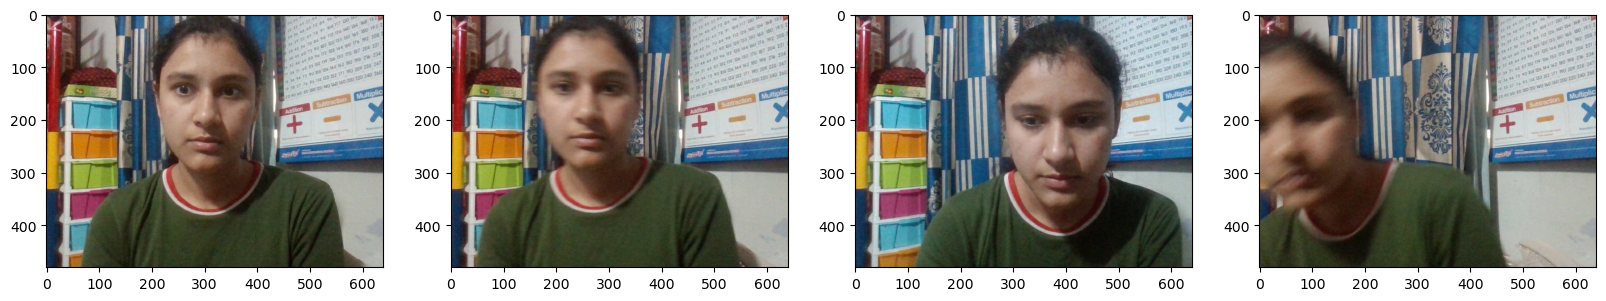

In [25]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, image in enumerate(plot_images):
    ax[idx].imshow(image) 
plt.show()

# 3. Partition Unaugmented Data

### 3.1 MANUALLY SPLT DATA INTO TRAIN TEST AND VAL

In [26]:
90*.7 # 63 to train

62.99999999999999

In [27]:
90*.15 # 14 and 13 to test and val

13.5

### 3.2 Move the Matching Labels

In [28]:
for folder in ['train','test','val']:
    for file in os.listdir(os.path.join('data', folder, 'images')):
        
        filename = file.split('.')[0]+'.json'
        existing_filepath = os.path.join('data','labels', filename)
        if os.path.exists(existing_filepath): 
            new_filepath = os.path.join('data',folder,'labels',filename)
            os.replace(existing_filepath, new_filepath)      

In [29]:
!pip install albumentations --user

# 4. Apply Image Augmentation on Images and Labels using Albumentations

### 4.1 Setup Albumentations Transform Pipeline

In [30]:
import albumentations as alb

In [31]:
augmentor = alb.Compose([alb.RandomCrop(width=450, height=450), 
                         alb.HorizontalFlip(p=0.5), 
                         alb.RandomBrightnessContrast(p=0.2),
                         alb.RandomGamma(p=0.2), 
                         alb.RGBShift(p=0.2), 
                         alb.VerticalFlip(p=0.5)], 
                       bbox_params=alb.BboxParams(format='albumentations', 
                                                  label_fields=['class_labels']))

### 4.2 Load a Test Image and Annotation with OpenCV and JSON

In [34]:
img = cv2.imread(os.path.join('data','train', 'images','0abd0721-ff0b-11ee-b46e-00e93ad23ed8.jpg'))

In [35]:
with open(os.path.join('data', 'train', 'labels', '0abd0721-ff0b-11ee-b46e-00e93ad23ed8.json'), 'r') as f:
    label = json.load(f)

In [36]:
label['shapes'][0]['points']

[[15.833333333333343, 62.77777777777777],
 [244.16666666666669, 359.44444444444446]]

In [37]:
label['shapes'][0]['points']

[[15.833333333333343, 62.77777777777777],
 [244.16666666666669, 359.44444444444446]]

### 4.3 Extract Coordinates and Rescale to Match Image Resolution

In [38]:
coords = [0,0,0,0]
coords[0] = label['shapes'][0]['points'][0][0]
coords[1] = label['shapes'][0]['points'][0][1]
coords[2] = label['shapes'][0]['points'][1][0]
coords[3] = label['shapes'][0]['points'][1][1]

In [39]:
coords

[15.833333333333343, 62.77777777777777, 244.16666666666669, 359.44444444444446]

In [40]:
coords = list(np.divide(coords, [640,480,640,480]))

In [41]:
coords

[0.02473958333333335,
 0.13078703703703703,
 0.3815104166666667,
 0.7488425925925927]

### 4.4 Apply Augmentations and View Results

In [42]:
augmented = augmentor(image=img, bboxes=[coords], class_labels=['face'])

In [43]:
augmented

{'image': array([[[183, 189, 190],
         [182, 189, 188],
         [183, 190, 189],
         ...,
         [ 23,  46,  41],
         [ 23,  46,  41],
         [ 24,  48,  42]],
 
        [[185, 193, 190],
         [186, 194, 191],
         [191, 198, 195],
         ...,
         [ 24,  48,  42],
         [ 22,  45,  41],
         [ 21,  44,  40]],
 
        [[184, 192, 186],
         [185, 193, 188],
         [190, 197, 192],
         ...,
         [ 23,  46,  41],
         [ 22,  45,  41],
         [ 20,  43,  39]],
 
        ...,
 
        [[200, 195, 194],
         [169, 164, 161],
         [174, 169, 166],
         ...,
         [190, 199, 209],
         [186, 193, 206],
         [196, 197, 211]],
 
        [[204, 201, 196],
         [186, 183, 178],
         [190, 186, 182],
         ...,
         [191, 201, 211],
         [183, 192, 205],
         [194, 197, 211]],
 
        [[204, 211, 198],
         [209, 213, 202],
         [210, 212, 206],
         ...,
         [188, 202,

In [44]:
augmented.keys()

dict_keys(['image', 'bboxes', 'class_labels'])

In [45]:
augmented['image']

array([[[183, 189, 190],
        [182, 189, 188],
        [183, 190, 189],
        ...,
        [ 23,  46,  41],
        [ 23,  46,  41],
        [ 24,  48,  42]],

       [[185, 193, 190],
        [186, 194, 191],
        [191, 198, 195],
        ...,
        [ 24,  48,  42],
        [ 22,  45,  41],
        [ 21,  44,  40]],

       [[184, 192, 186],
        [185, 193, 188],
        [190, 197, 192],
        ...,
        [ 23,  46,  41],
        [ 22,  45,  41],
        [ 20,  43,  39]],

       ...,

       [[200, 195, 194],
        [169, 164, 161],
        [174, 169, 166],
        ...,
        [190, 199, 209],
        [186, 193, 206],
        [196, 197, 211]],

       [[204, 201, 196],
        [186, 183, 178],
        [190, 186, 182],
        ...,
        [191, 201, 211],
        [183, 192, 205],
        [194, 197, 211]],

       [[204, 211, 198],
        [209, 213, 202],
        [210, 212, 206],
        ...,
        [188, 202, 214],
        [185, 198, 210],
        [188, 191, 205]]

In [46]:
augmented['bboxes'][0][2:]

(1.0, 0.8938271604938272)

In [47]:
augmented['bboxes']

[(0.8774074074074074, 0.23456790123456783, 1.0, 0.8938271604938272)]

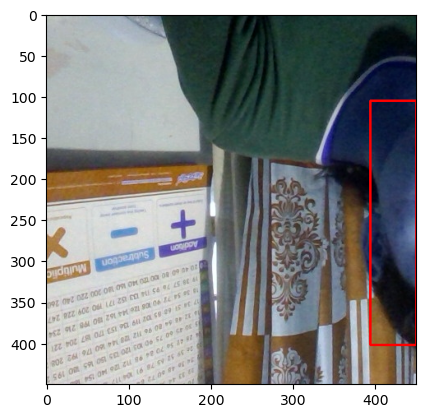

In [48]:
cv2.rectangle(augmented['image'], 
              tuple(np.multiply(augmented['bboxes'][0][:2], [450,450]).astype(int)),
              tuple(np.multiply(augmented['bboxes'][0][2:], [450,450]).astype(int)), 
                    (255,0,0), 2)

plt.imshow(augmented['image'])

# 5. Build and Run Augmentation Pipeline

### 5.1 Run Augmentation Pipeline

In [49]:
for partition in ['train','test','val']: 
    for image in os.listdir(os.path.join('data', partition, 'images')):
        img = cv2.imread(os.path.join('data', partition, 'images', image))

        coords = [0,0,0.00001,0.00001]
        label_path = os.path.join('data', partition, 'labels', f'{image.split(".")[0]}.json')
        if os.path.exists(label_path):
            with open(label_path, 'r') as f:
                label = json.load(f)

            coords[0] = label['shapes'][0]['points'][0][0]
            coords[1] = label['shapes'][0]['points'][0][1]
            coords[2] = label['shapes'][0]['points'][1][0]
            coords[3] = label['shapes'][0]['points'][1][1]
            coords = list(np.divide(coords, [640,480,640,480]))

        try: 
            for x in range(60):
                augmented = augmentor(image=img, bboxes=[coords], class_labels=['face'])
                cv2.imwrite(os.path.join('aug_data', partition, 'images', f'{image.split(".")[0]}.{x}.jpg'), augmented['image'])

                annotation = {}
                annotation['image'] = image

                if os.path.exists(label_path):
                    if len(augmented['bboxes']) == 0: 
                        annotation['bbox'] = [0,0,0,0]
                        annotation['class'] = 0 
                    else: 
                        annotation['bbox'] = augmented['bboxes'][0]
                        annotation['class'] = 1
                else: 
                    annotation['bbox'] = [0,0,0,0]
                    annotation['class'] = 0 


                with open(os.path.join('aug_data', partition, 'labels', f'{image.split(".")[0]}.{x}.json'), 'w') as f:
                    json.dump(annotation, f)

        except Exception as e:
            print(e)

y_max is less than or equal to y_min for bbox [0.34765625, 0.7743055555555556, 0.7105034722222222, 0.13425925925925924, 'face'].
x_max is less than or equal to x_min for bbox [0.997829861111111, 0.9930555555555556, 0.8433159722222221, 0.21296296296296294, 'face'].
x_max is less than or equal to x_min for bbox [0.997829861111111, 0.994212962962963, 0.818142361111111, 0.1273148148148148, 'face'].
x_max is less than or equal to x_min for bbox [0.994357638888889, 0.9050925925925927, 0.6888020833333333, 0.07638888888888888, 'face'].
x_max is less than or equal to x_min for bbox [0.22873263888888892, 0.8553240740740741, 0.0, 0.22861340048840048, 'face'].
x_max is less than or equal to x_min for bbox [0.21397569444444448, 0.8900462962962963, 4.4408920985006264e-17, 0.23682834620334614, 'face'].
x_max is less than or equal to x_min for bbox [0.07595486111111112, 0.9918981481481481, 1.1102230246251566e-17, 0.5168539996181749, 'face'].
x_max is less than or equal to x_min for bbox [0.99609375, 0

In [50]:
import os
import cv2
import json
import numpy as np

# Assuming `augmentor` is defined elsewhere
# augmentor = ...

for partition in ['train', 'test', 'val']:
    print(f"Processing partition: {partition}")
    
    images_dir = os.path.join('data', partition, 'images')
    labels_dir = os.path.join('data', partition, 'labels')
    
    print(f"Images directory: {images_dir}")
    print(f"Labels directory: {labels_dir}")
    
    for image in os.listdir(images_dir):
        print(f"Processing image: {image}")
        
        img_path = os.path.join(images_dir, image)
        label_path = os.path.join(labels_dir, f'{image.split(".")[0]}.json')
        
        print(f"Image path: {img_path}")
        print(f"Label path: {label_path}")
        
        # Load image
        img = cv2.imread(img_path)
        
        coords = [0, 0, 0.00001, 0.00001]
        if os.path.exists(label_path):
            with open(label_path, 'r') as f:
                label = json.load(f)
            coords[0] = label['shapes'][0]['points'][0][0]
            coords[1] = label['shapes'][0]['points'][0][1]
            coords[2] = label['shapes'][0]['points'][1][0]
            coords[3] = label['shapes'][0]['points'][1][1]
            coords = list(np.divide(coords, [640, 480, 640, 480]))
        
        print(f"Bounding box coordinates: {coords}")
        
        try:
            for x in range(60):
                augmented = augmentor(image=img, bboxes=[coords], class_labels=['face'])
                
                augmented_img_path = os.path.join('aug_data', partition, 'images', f'{image.split(".")[0]}.{x}.jpg')
                print(f"Augmented image path: {augmented_img_path}")
                
                cv2.imwrite(augmented_img_path, augmented['image'])

                annotation = {'image': image}
                if os.path.exists(label_path):
                    if len(augmented['bboxes']) == 0:
                        annotation['bbox'] = [0, 0, 0, 0]
                        annotation['class'] = 0
                    else:
                        annotation['bbox'] = augmented['bboxes'][0]
                        annotation['class'] = 1
                else:
                    annotation['bbox'] = [0, 0, 0, 0]
                    annotation['class'] = 0

                augmented_label_path = os.path.join('aug_data', partition, 'labels', f'{image.split(".")[0]}.{x}.json')
                print(f"Augmented label path: {augmented_label_path}")

                with open(augmented_label_path, 'w') as f:
                    json.dump(annotation, f)

        except Exception as e:
            print(e)


Processing partition: train
Images directory: data\train\images
Labels directory: data\train\labels
Processing image: 0025e563-ff0b-11ee-895f-00e93ad23ed8.jpg
Image path: data\train\images\0025e563-ff0b-11ee-895f-00e93ad23ed8.jpg
Label path: data\train\labels\0025e563-ff0b-11ee-895f-00e93ad23ed8.json
Bounding box coordinates: [0.3658854166666667, 0.02777777777777778, 0.6306423611111112, 0.619212962962963]
Augmented image path: aug_data\train\images\0025e563-ff0b-11ee-895f-00e93ad23ed8.0.jpg
Augmented label path: aug_data\train\labels\0025e563-ff0b-11ee-895f-00e93ad23ed8.0.json
Augmented image path: aug_data\train\images\0025e563-ff0b-11ee-895f-00e93ad23ed8.1.jpg
Augmented label path: aug_data\train\labels\0025e563-ff0b-11ee-895f-00e93ad23ed8.1.json
Augmented image path: aug_data\train\images\0025e563-ff0b-11ee-895f-00e93ad23ed8.2.jpg
Augmented label path: aug_data\train\labels\0025e563-ff0b-11ee-895f-00e93ad23ed8.2.json
Augmented image path: aug_data\train\images\0025e563-ff0b-11ee-895

Augmented label path: aug_data\train\labels\0025e563-ff0b-11ee-895f-00e93ad23ed8.52.json
Augmented image path: aug_data\train\images\0025e563-ff0b-11ee-895f-00e93ad23ed8.53.jpg
Augmented label path: aug_data\train\labels\0025e563-ff0b-11ee-895f-00e93ad23ed8.53.json
Augmented image path: aug_data\train\images\0025e563-ff0b-11ee-895f-00e93ad23ed8.54.jpg
Augmented label path: aug_data\train\labels\0025e563-ff0b-11ee-895f-00e93ad23ed8.54.json
Augmented image path: aug_data\train\images\0025e563-ff0b-11ee-895f-00e93ad23ed8.55.jpg
Augmented label path: aug_data\train\labels\0025e563-ff0b-11ee-895f-00e93ad23ed8.55.json
Augmented image path: aug_data\train\images\0025e563-ff0b-11ee-895f-00e93ad23ed8.56.jpg
Augmented label path: aug_data\train\labels\0025e563-ff0b-11ee-895f-00e93ad23ed8.56.json
Augmented image path: aug_data\train\images\0025e563-ff0b-11ee-895f-00e93ad23ed8.57.jpg
Augmented label path: aug_data\train\labels\0025e563-ff0b-11ee-895f-00e93ad23ed8.57.json
Augmented image path: aug_

Augmented label path: aug_data\train\labels\0075b425-ff0b-11ee-a89b-00e93ad23ed8.45.json
Augmented image path: aug_data\train\images\0075b425-ff0b-11ee-a89b-00e93ad23ed8.46.jpg
Augmented label path: aug_data\train\labels\0075b425-ff0b-11ee-a89b-00e93ad23ed8.46.json
Augmented image path: aug_data\train\images\0075b425-ff0b-11ee-a89b-00e93ad23ed8.47.jpg
Augmented label path: aug_data\train\labels\0075b425-ff0b-11ee-a89b-00e93ad23ed8.47.json
Augmented image path: aug_data\train\images\0075b425-ff0b-11ee-a89b-00e93ad23ed8.48.jpg
Augmented label path: aug_data\train\labels\0075b425-ff0b-11ee-a89b-00e93ad23ed8.48.json
Augmented image path: aug_data\train\images\0075b425-ff0b-11ee-a89b-00e93ad23ed8.49.jpg
Augmented label path: aug_data\train\labels\0075b425-ff0b-11ee-a89b-00e93ad23ed8.49.json
Augmented image path: aug_data\train\images\0075b425-ff0b-11ee-a89b-00e93ad23ed8.50.jpg
Augmented label path: aug_data\train\labels\0075b425-ff0b-11ee-a89b-00e93ad23ed8.50.json
Augmented image path: aug_

Augmented label path: aug_data\train\labels\01663b28-ff0b-11ee-a880-00e93ad23ed8.37.json
Augmented image path: aug_data\train\images\01663b28-ff0b-11ee-a880-00e93ad23ed8.38.jpg
Augmented label path: aug_data\train\labels\01663b28-ff0b-11ee-a880-00e93ad23ed8.38.json
Augmented image path: aug_data\train\images\01663b28-ff0b-11ee-a880-00e93ad23ed8.39.jpg
Augmented label path: aug_data\train\labels\01663b28-ff0b-11ee-a880-00e93ad23ed8.39.json
Augmented image path: aug_data\train\images\01663b28-ff0b-11ee-a880-00e93ad23ed8.40.jpg
Augmented label path: aug_data\train\labels\01663b28-ff0b-11ee-a880-00e93ad23ed8.40.json
Augmented image path: aug_data\train\images\01663b28-ff0b-11ee-a880-00e93ad23ed8.41.jpg
Augmented label path: aug_data\train\labels\01663b28-ff0b-11ee-a880-00e93ad23ed8.41.json
Augmented image path: aug_data\train\images\01663b28-ff0b-11ee-a880-00e93ad23ed8.42.jpg
Augmented label path: aug_data\train\labels\01663b28-ff0b-11ee-a880-00e93ad23ed8.42.json
Augmented image path: aug_

Augmented label path: aug_data\train\labels\08ce4df8-ff0b-11ee-8276-00e93ad23ed8.28.json
Augmented image path: aug_data\train\images\08ce4df8-ff0b-11ee-8276-00e93ad23ed8.29.jpg
Augmented label path: aug_data\train\labels\08ce4df8-ff0b-11ee-8276-00e93ad23ed8.29.json
Augmented image path: aug_data\train\images\08ce4df8-ff0b-11ee-8276-00e93ad23ed8.30.jpg
Augmented label path: aug_data\train\labels\08ce4df8-ff0b-11ee-8276-00e93ad23ed8.30.json
Augmented image path: aug_data\train\images\08ce4df8-ff0b-11ee-8276-00e93ad23ed8.31.jpg
Augmented label path: aug_data\train\labels\08ce4df8-ff0b-11ee-8276-00e93ad23ed8.31.json
Augmented image path: aug_data\train\images\08ce4df8-ff0b-11ee-8276-00e93ad23ed8.32.jpg
Augmented label path: aug_data\train\labels\08ce4df8-ff0b-11ee-8276-00e93ad23ed8.32.json
Augmented image path: aug_data\train\images\08ce4df8-ff0b-11ee-8276-00e93ad23ed8.33.jpg
Augmented label path: aug_data\train\labels\08ce4df8-ff0b-11ee-8276-00e93ad23ed8.33.json
Augmented image path: aug_

Augmented image path: aug_data\train\images\09247095-ff0b-11ee-9782-00e93ad23ed8.21.jpg
Augmented label path: aug_data\train\labels\09247095-ff0b-11ee-9782-00e93ad23ed8.21.json
Augmented image path: aug_data\train\images\09247095-ff0b-11ee-9782-00e93ad23ed8.22.jpg
Augmented label path: aug_data\train\labels\09247095-ff0b-11ee-9782-00e93ad23ed8.22.json
Augmented image path: aug_data\train\images\09247095-ff0b-11ee-9782-00e93ad23ed8.23.jpg
Augmented label path: aug_data\train\labels\09247095-ff0b-11ee-9782-00e93ad23ed8.23.json
Augmented image path: aug_data\train\images\09247095-ff0b-11ee-9782-00e93ad23ed8.24.jpg
Augmented label path: aug_data\train\labels\09247095-ff0b-11ee-9782-00e93ad23ed8.24.json
Augmented image path: aug_data\train\images\09247095-ff0b-11ee-9782-00e93ad23ed8.25.jpg
Augmented label path: aug_data\train\labels\09247095-ff0b-11ee-9782-00e93ad23ed8.25.json
Augmented image path: aug_data\train\images\09247095-ff0b-11ee-9782-00e93ad23ed8.26.jpg
Augmented label path: aug_d

Augmented image path: aug_data\train\images\09770c5d-ff0b-11ee-9e7a-00e93ad23ed8.13.jpg
Augmented label path: aug_data\train\labels\09770c5d-ff0b-11ee-9e7a-00e93ad23ed8.13.json
Augmented image path: aug_data\train\images\09770c5d-ff0b-11ee-9e7a-00e93ad23ed8.14.jpg
Augmented label path: aug_data\train\labels\09770c5d-ff0b-11ee-9e7a-00e93ad23ed8.14.json
Augmented image path: aug_data\train\images\09770c5d-ff0b-11ee-9e7a-00e93ad23ed8.15.jpg
Augmented label path: aug_data\train\labels\09770c5d-ff0b-11ee-9e7a-00e93ad23ed8.15.json
Augmented image path: aug_data\train\images\09770c5d-ff0b-11ee-9e7a-00e93ad23ed8.16.jpg
Augmented label path: aug_data\train\labels\09770c5d-ff0b-11ee-9e7a-00e93ad23ed8.16.json
Augmented image path: aug_data\train\images\09770c5d-ff0b-11ee-9e7a-00e93ad23ed8.17.jpg
Augmented label path: aug_data\train\labels\09770c5d-ff0b-11ee-9e7a-00e93ad23ed8.17.json
Augmented image path: aug_data\train\images\09770c5d-ff0b-11ee-9e7a-00e93ad23ed8.18.jpg
Augmented label path: aug_d

Augmented image path: aug_data\train\images\0a196389-ff0b-11ee-b479-00e93ad23ed8.4.jpg
Augmented label path: aug_data\train\labels\0a196389-ff0b-11ee-b479-00e93ad23ed8.4.json
Augmented image path: aug_data\train\images\0a196389-ff0b-11ee-b479-00e93ad23ed8.5.jpg
Augmented label path: aug_data\train\labels\0a196389-ff0b-11ee-b479-00e93ad23ed8.5.json
Augmented image path: aug_data\train\images\0a196389-ff0b-11ee-b479-00e93ad23ed8.6.jpg
Augmented label path: aug_data\train\labels\0a196389-ff0b-11ee-b479-00e93ad23ed8.6.json
Augmented image path: aug_data\train\images\0a196389-ff0b-11ee-b479-00e93ad23ed8.7.jpg
Augmented label path: aug_data\train\labels\0a196389-ff0b-11ee-b479-00e93ad23ed8.7.json
Augmented image path: aug_data\train\images\0a196389-ff0b-11ee-b479-00e93ad23ed8.8.jpg
Augmented label path: aug_data\train\labels\0a196389-ff0b-11ee-b479-00e93ad23ed8.8.json
Augmented image path: aug_data\train\images\0a196389-ff0b-11ee-b479-00e93ad23ed8.9.jpg
Augmented label path: aug_data\train\l

Augmented label path: aug_data\train\labels\0a196389-ff0b-11ee-b479-00e93ad23ed8.54.json
Augmented image path: aug_data\train\images\0a196389-ff0b-11ee-b479-00e93ad23ed8.55.jpg
Augmented label path: aug_data\train\labels\0a196389-ff0b-11ee-b479-00e93ad23ed8.55.json
Augmented image path: aug_data\train\images\0a196389-ff0b-11ee-b479-00e93ad23ed8.56.jpg
Augmented label path: aug_data\train\labels\0a196389-ff0b-11ee-b479-00e93ad23ed8.56.json
Augmented image path: aug_data\train\images\0a196389-ff0b-11ee-b479-00e93ad23ed8.57.jpg
Augmented label path: aug_data\train\labels\0a196389-ff0b-11ee-b479-00e93ad23ed8.57.json
Augmented image path: aug_data\train\images\0a196389-ff0b-11ee-b479-00e93ad23ed8.58.jpg
Augmented label path: aug_data\train\labels\0a196389-ff0b-11ee-b479-00e93ad23ed8.58.json
Augmented image path: aug_data\train\images\0a196389-ff0b-11ee-b479-00e93ad23ed8.59.jpg
Augmented label path: aug_data\train\labels\0a196389-ff0b-11ee-b479-00e93ad23ed8.59.json
Processing image: 0abd0721

Augmented image path: aug_data\train\images\0abd0721-ff0b-11ee-b46e-00e93ad23ed8.47.jpg
Augmented label path: aug_data\train\labels\0abd0721-ff0b-11ee-b46e-00e93ad23ed8.47.json
Augmented image path: aug_data\train\images\0abd0721-ff0b-11ee-b46e-00e93ad23ed8.48.jpg
Augmented label path: aug_data\train\labels\0abd0721-ff0b-11ee-b46e-00e93ad23ed8.48.json
Augmented image path: aug_data\train\images\0abd0721-ff0b-11ee-b46e-00e93ad23ed8.49.jpg
Augmented label path: aug_data\train\labels\0abd0721-ff0b-11ee-b46e-00e93ad23ed8.49.json
Augmented image path: aug_data\train\images\0abd0721-ff0b-11ee-b46e-00e93ad23ed8.50.jpg
Augmented label path: aug_data\train\labels\0abd0721-ff0b-11ee-b46e-00e93ad23ed8.50.json
Augmented image path: aug_data\train\images\0abd0721-ff0b-11ee-b46e-00e93ad23ed8.51.jpg
Augmented label path: aug_data\train\labels\0abd0721-ff0b-11ee-b46e-00e93ad23ed8.51.json
Augmented image path: aug_data\train\images\0abd0721-ff0b-11ee-b46e-00e93ad23ed8.52.jpg
Augmented label path: aug_d

Augmented label path: aug_data\train\labels\0bb0ffb1-ff0b-11ee-a245-00e93ad23ed8.37.json
Augmented image path: aug_data\train\images\0bb0ffb1-ff0b-11ee-a245-00e93ad23ed8.38.jpg
Augmented label path: aug_data\train\labels\0bb0ffb1-ff0b-11ee-a245-00e93ad23ed8.38.json
Augmented image path: aug_data\train\images\0bb0ffb1-ff0b-11ee-a245-00e93ad23ed8.39.jpg
Augmented label path: aug_data\train\labels\0bb0ffb1-ff0b-11ee-a245-00e93ad23ed8.39.json
Augmented image path: aug_data\train\images\0bb0ffb1-ff0b-11ee-a245-00e93ad23ed8.40.jpg
Augmented label path: aug_data\train\labels\0bb0ffb1-ff0b-11ee-a245-00e93ad23ed8.40.json
Augmented image path: aug_data\train\images\0bb0ffb1-ff0b-11ee-a245-00e93ad23ed8.41.jpg
Augmented label path: aug_data\train\labels\0bb0ffb1-ff0b-11ee-a245-00e93ad23ed8.41.json
Augmented image path: aug_data\train\images\0bb0ffb1-ff0b-11ee-a245-00e93ad23ed8.42.jpg
Augmented label path: aug_data\train\labels\0bb0ffb1-ff0b-11ee-a245-00e93ad23ed8.42.json
Augmented image path: aug_

Augmented label path: aug_data\train\labels\0c51d50e-ff0b-11ee-b1ae-00e93ad23ed8.26.json
Augmented image path: aug_data\train\images\0c51d50e-ff0b-11ee-b1ae-00e93ad23ed8.27.jpg
Augmented label path: aug_data\train\labels\0c51d50e-ff0b-11ee-b1ae-00e93ad23ed8.27.json
Augmented image path: aug_data\train\images\0c51d50e-ff0b-11ee-b1ae-00e93ad23ed8.28.jpg
Augmented label path: aug_data\train\labels\0c51d50e-ff0b-11ee-b1ae-00e93ad23ed8.28.json
Augmented image path: aug_data\train\images\0c51d50e-ff0b-11ee-b1ae-00e93ad23ed8.29.jpg
Augmented label path: aug_data\train\labels\0c51d50e-ff0b-11ee-b1ae-00e93ad23ed8.29.json
Augmented image path: aug_data\train\images\0c51d50e-ff0b-11ee-b1ae-00e93ad23ed8.30.jpg
Augmented label path: aug_data\train\labels\0c51d50e-ff0b-11ee-b1ae-00e93ad23ed8.30.json
Augmented image path: aug_data\train\images\0c51d50e-ff0b-11ee-b1ae-00e93ad23ed8.31.jpg
Augmented label path: aug_data\train\labels\0c51d50e-ff0b-11ee-b1ae-00e93ad23ed8.31.json
Augmented image path: aug_

Augmented label path: aug_data\train\labels\0f22a460-ff0b-11ee-a76c-00e93ad23ed8.6.json
Augmented image path: aug_data\train\images\0f22a460-ff0b-11ee-a76c-00e93ad23ed8.7.jpg
Augmented label path: aug_data\train\labels\0f22a460-ff0b-11ee-a76c-00e93ad23ed8.7.json
Augmented image path: aug_data\train\images\0f22a460-ff0b-11ee-a76c-00e93ad23ed8.8.jpg
Augmented label path: aug_data\train\labels\0f22a460-ff0b-11ee-a76c-00e93ad23ed8.8.json
Augmented image path: aug_data\train\images\0f22a460-ff0b-11ee-a76c-00e93ad23ed8.9.jpg
Augmented label path: aug_data\train\labels\0f22a460-ff0b-11ee-a76c-00e93ad23ed8.9.json
Augmented image path: aug_data\train\images\0f22a460-ff0b-11ee-a76c-00e93ad23ed8.10.jpg
Augmented label path: aug_data\train\labels\0f22a460-ff0b-11ee-a76c-00e93ad23ed8.10.json
Augmented image path: aug_data\train\images\0f22a460-ff0b-11ee-a76c-00e93ad23ed8.11.jpg
Augmented label path: aug_data\train\labels\0f22a460-ff0b-11ee-a76c-00e93ad23ed8.11.json
Augmented image path: aug_data\tr

Bounding box coordinates: [0.21397569444444448, 0.8900462962962963, 4.4408920985006264e-17, 0.23682834620334614]
x_max is less than or equal to x_min for bbox [0.21397569444444448, 0.8900462962962963, 4.4408920985006264e-17, 0.23682834620334614, 'face'].
Processing image: 11a58332-ff0b-11ee-924a-00e93ad23ed8.jpg
Image path: data\train\images\11a58332-ff0b-11ee-924a-00e93ad23ed8.jpg
Label path: data\train\labels\11a58332-ff0b-11ee-924a-00e93ad23ed8.json
Bounding box coordinates: [0.0021701388888888838, 0.5034722222222222, 0.08203125, 0.9918981481481481]
Augmented image path: aug_data\train\images\11a58332-ff0b-11ee-924a-00e93ad23ed8.0.jpg
Augmented label path: aug_data\train\labels\11a58332-ff0b-11ee-924a-00e93ad23ed8.0.json
Augmented image path: aug_data\train\images\11a58332-ff0b-11ee-924a-00e93ad23ed8.1.jpg
Augmented label path: aug_data\train\labels\11a58332-ff0b-11ee-924a-00e93ad23ed8.1.json
Augmented image path: aug_data\train\images\11a58332-ff0b-11ee-924a-00e93ad23ed8.2.jpg
Augm

Augmented label path: aug_data\train\labels\11a58332-ff0b-11ee-924a-00e93ad23ed8.53.json
Augmented image path: aug_data\train\images\11a58332-ff0b-11ee-924a-00e93ad23ed8.54.jpg
Augmented label path: aug_data\train\labels\11a58332-ff0b-11ee-924a-00e93ad23ed8.54.json
Augmented image path: aug_data\train\images\11a58332-ff0b-11ee-924a-00e93ad23ed8.55.jpg
Augmented label path: aug_data\train\labels\11a58332-ff0b-11ee-924a-00e93ad23ed8.55.json
Augmented image path: aug_data\train\images\11a58332-ff0b-11ee-924a-00e93ad23ed8.56.jpg
Augmented label path: aug_data\train\labels\11a58332-ff0b-11ee-924a-00e93ad23ed8.56.json
Augmented image path: aug_data\train\images\11a58332-ff0b-11ee-924a-00e93ad23ed8.57.jpg
Augmented label path: aug_data\train\labels\11a58332-ff0b-11ee-924a-00e93ad23ed8.57.json
Augmented image path: aug_data\train\images\11a58332-ff0b-11ee-924a-00e93ad23ed8.58.jpg
Augmented label path: aug_data\train\labels\11a58332-ff0b-11ee-924a-00e93ad23ed8.58.json
Augmented image path: aug_

Augmented label path: aug_data\train\labels\1ac4b825-ff0b-11ee-96f3-00e93ad23ed8.43.json
Augmented image path: aug_data\train\images\1ac4b825-ff0b-11ee-96f3-00e93ad23ed8.44.jpg
Augmented label path: aug_data\train\labels\1ac4b825-ff0b-11ee-96f3-00e93ad23ed8.44.json
Augmented image path: aug_data\train\images\1ac4b825-ff0b-11ee-96f3-00e93ad23ed8.45.jpg
Augmented label path: aug_data\train\labels\1ac4b825-ff0b-11ee-96f3-00e93ad23ed8.45.json
Augmented image path: aug_data\train\images\1ac4b825-ff0b-11ee-96f3-00e93ad23ed8.46.jpg
Augmented label path: aug_data\train\labels\1ac4b825-ff0b-11ee-96f3-00e93ad23ed8.46.json
Augmented image path: aug_data\train\images\1ac4b825-ff0b-11ee-96f3-00e93ad23ed8.47.jpg
Augmented label path: aug_data\train\labels\1ac4b825-ff0b-11ee-96f3-00e93ad23ed8.47.json
Augmented image path: aug_data\train\images\1ac4b825-ff0b-11ee-96f3-00e93ad23ed8.48.jpg
Augmented label path: aug_data\train\labels\1ac4b825-ff0b-11ee-96f3-00e93ad23ed8.48.json
Augmented image path: aug_

Augmented label path: aug_data\train\labels\1b1cf4f5-ff0b-11ee-8afb-00e93ad23ed8.36.json
Augmented image path: aug_data\train\images\1b1cf4f5-ff0b-11ee-8afb-00e93ad23ed8.37.jpg
Augmented label path: aug_data\train\labels\1b1cf4f5-ff0b-11ee-8afb-00e93ad23ed8.37.json
Augmented image path: aug_data\train\images\1b1cf4f5-ff0b-11ee-8afb-00e93ad23ed8.38.jpg
Augmented label path: aug_data\train\labels\1b1cf4f5-ff0b-11ee-8afb-00e93ad23ed8.38.json
Augmented image path: aug_data\train\images\1b1cf4f5-ff0b-11ee-8afb-00e93ad23ed8.39.jpg
Augmented label path: aug_data\train\labels\1b1cf4f5-ff0b-11ee-8afb-00e93ad23ed8.39.json
Augmented image path: aug_data\train\images\1b1cf4f5-ff0b-11ee-8afb-00e93ad23ed8.40.jpg
Augmented label path: aug_data\train\labels\1b1cf4f5-ff0b-11ee-8afb-00e93ad23ed8.40.json
Augmented image path: aug_data\train\images\1b1cf4f5-ff0b-11ee-8afb-00e93ad23ed8.41.jpg
Augmented label path: aug_data\train\labels\1b1cf4f5-ff0b-11ee-8afb-00e93ad23ed8.41.json
Augmented image path: aug_

Augmented label path: aug_data\train\labels\1b6d532c-ff0b-11ee-b4e4-00e93ad23ed8.25.json
Augmented image path: aug_data\train\images\1b6d532c-ff0b-11ee-b4e4-00e93ad23ed8.26.jpg
Augmented label path: aug_data\train\labels\1b6d532c-ff0b-11ee-b4e4-00e93ad23ed8.26.json
Augmented image path: aug_data\train\images\1b6d532c-ff0b-11ee-b4e4-00e93ad23ed8.27.jpg
Augmented label path: aug_data\train\labels\1b6d532c-ff0b-11ee-b4e4-00e93ad23ed8.27.json
Augmented image path: aug_data\train\images\1b6d532c-ff0b-11ee-b4e4-00e93ad23ed8.28.jpg
Augmented label path: aug_data\train\labels\1b6d532c-ff0b-11ee-b4e4-00e93ad23ed8.28.json
Augmented image path: aug_data\train\images\1b6d532c-ff0b-11ee-b4e4-00e93ad23ed8.29.jpg
Augmented label path: aug_data\train\labels\1b6d532c-ff0b-11ee-b4e4-00e93ad23ed8.29.json
Augmented image path: aug_data\train\images\1b6d532c-ff0b-11ee-b4e4-00e93ad23ed8.30.jpg
Augmented label path: aug_data\train\labels\1b6d532c-ff0b-11ee-b4e4-00e93ad23ed8.30.json
Augmented image path: aug_

Augmented label path: aug_data\train\labels\1bbecfc5-ff0b-11ee-aa51-00e93ad23ed8.18.json
Augmented image path: aug_data\train\images\1bbecfc5-ff0b-11ee-aa51-00e93ad23ed8.19.jpg
Augmented label path: aug_data\train\labels\1bbecfc5-ff0b-11ee-aa51-00e93ad23ed8.19.json
Augmented image path: aug_data\train\images\1bbecfc5-ff0b-11ee-aa51-00e93ad23ed8.20.jpg
Augmented label path: aug_data\train\labels\1bbecfc5-ff0b-11ee-aa51-00e93ad23ed8.20.json
Augmented image path: aug_data\train\images\1bbecfc5-ff0b-11ee-aa51-00e93ad23ed8.21.jpg
Augmented label path: aug_data\train\labels\1bbecfc5-ff0b-11ee-aa51-00e93ad23ed8.21.json
Augmented image path: aug_data\train\images\1bbecfc5-ff0b-11ee-aa51-00e93ad23ed8.22.jpg
Augmented label path: aug_data\train\labels\1bbecfc5-ff0b-11ee-aa51-00e93ad23ed8.22.json
Augmented image path: aug_data\train\images\1bbecfc5-ff0b-11ee-aa51-00e93ad23ed8.23.jpg
Augmented label path: aug_data\train\labels\1bbecfc5-ff0b-11ee-aa51-00e93ad23ed8.23.json
Augmented image path: aug_

Augmented image path: aug_data\train\images\1c1026b6-ff0b-11ee-b946-00e93ad23ed8.10.jpg
Augmented label path: aug_data\train\labels\1c1026b6-ff0b-11ee-b946-00e93ad23ed8.10.json
Augmented image path: aug_data\train\images\1c1026b6-ff0b-11ee-b946-00e93ad23ed8.11.jpg
Augmented label path: aug_data\train\labels\1c1026b6-ff0b-11ee-b946-00e93ad23ed8.11.json
Augmented image path: aug_data\train\images\1c1026b6-ff0b-11ee-b946-00e93ad23ed8.12.jpg
Augmented label path: aug_data\train\labels\1c1026b6-ff0b-11ee-b946-00e93ad23ed8.12.json
Augmented image path: aug_data\train\images\1c1026b6-ff0b-11ee-b946-00e93ad23ed8.13.jpg
Augmented label path: aug_data\train\labels\1c1026b6-ff0b-11ee-b946-00e93ad23ed8.13.json
Augmented image path: aug_data\train\images\1c1026b6-ff0b-11ee-b946-00e93ad23ed8.14.jpg
Augmented label path: aug_data\train\labels\1c1026b6-ff0b-11ee-b946-00e93ad23ed8.14.json
Augmented image path: aug_data\train\images\1c1026b6-ff0b-11ee-b946-00e93ad23ed8.15.jpg
Augmented label path: aug_d

Augmented label path: aug_data\train\labels\1c60c39e-ff0b-11ee-8b25-00e93ad23ed8.2.json
Augmented image path: aug_data\train\images\1c60c39e-ff0b-11ee-8b25-00e93ad23ed8.3.jpg
Augmented label path: aug_data\train\labels\1c60c39e-ff0b-11ee-8b25-00e93ad23ed8.3.json
Augmented image path: aug_data\train\images\1c60c39e-ff0b-11ee-8b25-00e93ad23ed8.4.jpg
Augmented label path: aug_data\train\labels\1c60c39e-ff0b-11ee-8b25-00e93ad23ed8.4.json
Augmented image path: aug_data\train\images\1c60c39e-ff0b-11ee-8b25-00e93ad23ed8.5.jpg
Augmented label path: aug_data\train\labels\1c60c39e-ff0b-11ee-8b25-00e93ad23ed8.5.json
Augmented image path: aug_data\train\images\1c60c39e-ff0b-11ee-8b25-00e93ad23ed8.6.jpg
Augmented label path: aug_data\train\labels\1c60c39e-ff0b-11ee-8b25-00e93ad23ed8.6.json
Augmented image path: aug_data\train\images\1c60c39e-ff0b-11ee-8b25-00e93ad23ed8.7.jpg
Augmented label path: aug_data\train\labels\1c60c39e-ff0b-11ee-8b25-00e93ad23ed8.7.json
Augmented image path: aug_data\train\

Augmented label path: aug_data\train\labels\1c60c39e-ff0b-11ee-8b25-00e93ad23ed8.54.json
Augmented image path: aug_data\train\images\1c60c39e-ff0b-11ee-8b25-00e93ad23ed8.55.jpg
Augmented label path: aug_data\train\labels\1c60c39e-ff0b-11ee-8b25-00e93ad23ed8.55.json
Augmented image path: aug_data\train\images\1c60c39e-ff0b-11ee-8b25-00e93ad23ed8.56.jpg
Augmented label path: aug_data\train\labels\1c60c39e-ff0b-11ee-8b25-00e93ad23ed8.56.json
Augmented image path: aug_data\train\images\1c60c39e-ff0b-11ee-8b25-00e93ad23ed8.57.jpg
Augmented label path: aug_data\train\labels\1c60c39e-ff0b-11ee-8b25-00e93ad23ed8.57.json
Augmented image path: aug_data\train\images\1c60c39e-ff0b-11ee-8b25-00e93ad23ed8.58.jpg
Augmented label path: aug_data\train\labels\1c60c39e-ff0b-11ee-8b25-00e93ad23ed8.58.json
Augmented image path: aug_data\train\images\1c60c39e-ff0b-11ee-8b25-00e93ad23ed8.59.jpg
Augmented label path: aug_data\train\labels\1c60c39e-ff0b-11ee-8b25-00e93ad23ed8.59.json
Processing image: 1d05c65c

Augmented image path: aug_data\train\images\1d05c65c-ff0b-11ee-af68-00e93ad23ed8.48.jpg
Augmented label path: aug_data\train\labels\1d05c65c-ff0b-11ee-af68-00e93ad23ed8.48.json
Augmented image path: aug_data\train\images\1d05c65c-ff0b-11ee-af68-00e93ad23ed8.49.jpg
Augmented label path: aug_data\train\labels\1d05c65c-ff0b-11ee-af68-00e93ad23ed8.49.json
Augmented image path: aug_data\train\images\1d05c65c-ff0b-11ee-af68-00e93ad23ed8.50.jpg
Augmented label path: aug_data\train\labels\1d05c65c-ff0b-11ee-af68-00e93ad23ed8.50.json
Augmented image path: aug_data\train\images\1d05c65c-ff0b-11ee-af68-00e93ad23ed8.51.jpg
Augmented label path: aug_data\train\labels\1d05c65c-ff0b-11ee-af68-00e93ad23ed8.51.json
Augmented image path: aug_data\train\images\1d05c65c-ff0b-11ee-af68-00e93ad23ed8.52.jpg
Augmented label path: aug_data\train\labels\1d05c65c-ff0b-11ee-af68-00e93ad23ed8.52.json
Augmented image path: aug_data\train\images\1d05c65c-ff0b-11ee-af68-00e93ad23ed8.53.jpg
Augmented label path: aug_d

Augmented image path: aug_data\train\images\1d571c3b-ff0b-11ee-916d-00e93ad23ed8.42.jpg
Augmented label path: aug_data\train\labels\1d571c3b-ff0b-11ee-916d-00e93ad23ed8.42.json
Augmented image path: aug_data\train\images\1d571c3b-ff0b-11ee-916d-00e93ad23ed8.43.jpg
Augmented label path: aug_data\train\labels\1d571c3b-ff0b-11ee-916d-00e93ad23ed8.43.json
Augmented image path: aug_data\train\images\1d571c3b-ff0b-11ee-916d-00e93ad23ed8.44.jpg
Augmented label path: aug_data\train\labels\1d571c3b-ff0b-11ee-916d-00e93ad23ed8.44.json
Augmented image path: aug_data\train\images\1d571c3b-ff0b-11ee-916d-00e93ad23ed8.45.jpg
Augmented label path: aug_data\train\labels\1d571c3b-ff0b-11ee-916d-00e93ad23ed8.45.json
Augmented image path: aug_data\train\images\1d571c3b-ff0b-11ee-916d-00e93ad23ed8.46.jpg
Augmented label path: aug_data\train\labels\1d571c3b-ff0b-11ee-916d-00e93ad23ed8.46.json
Augmented image path: aug_data\train\images\1d571c3b-ff0b-11ee-916d-00e93ad23ed8.47.jpg
Augmented label path: aug_d

Augmented label path: aug_data\train\labels\1df7f33a-ff0b-11ee-bc64-00e93ad23ed8.34.json
Augmented image path: aug_data\train\images\1df7f33a-ff0b-11ee-bc64-00e93ad23ed8.35.jpg
Augmented label path: aug_data\train\labels\1df7f33a-ff0b-11ee-bc64-00e93ad23ed8.35.json
Augmented image path: aug_data\train\images\1df7f33a-ff0b-11ee-bc64-00e93ad23ed8.36.jpg
Augmented label path: aug_data\train\labels\1df7f33a-ff0b-11ee-bc64-00e93ad23ed8.36.json
Augmented image path: aug_data\train\images\1df7f33a-ff0b-11ee-bc64-00e93ad23ed8.37.jpg
Augmented label path: aug_data\train\labels\1df7f33a-ff0b-11ee-bc64-00e93ad23ed8.37.json
Augmented image path: aug_data\train\images\1df7f33a-ff0b-11ee-bc64-00e93ad23ed8.38.jpg
Augmented label path: aug_data\train\labels\1df7f33a-ff0b-11ee-bc64-00e93ad23ed8.38.json
Augmented image path: aug_data\train\images\1df7f33a-ff0b-11ee-bc64-00e93ad23ed8.39.jpg
Augmented label path: aug_data\train\labels\1df7f33a-ff0b-11ee-bc64-00e93ad23ed8.39.json
Augmented image path: aug_

Augmented label path: aug_data\train\labels\1e47e7f3-ff0b-11ee-8ade-00e93ad23ed8.25.json
Augmented image path: aug_data\train\images\1e47e7f3-ff0b-11ee-8ade-00e93ad23ed8.26.jpg
Augmented label path: aug_data\train\labels\1e47e7f3-ff0b-11ee-8ade-00e93ad23ed8.26.json
Augmented image path: aug_data\train\images\1e47e7f3-ff0b-11ee-8ade-00e93ad23ed8.27.jpg
Augmented label path: aug_data\train\labels\1e47e7f3-ff0b-11ee-8ade-00e93ad23ed8.27.json
Augmented image path: aug_data\train\images\1e47e7f3-ff0b-11ee-8ade-00e93ad23ed8.28.jpg
Augmented label path: aug_data\train\labels\1e47e7f3-ff0b-11ee-8ade-00e93ad23ed8.28.json
Augmented image path: aug_data\train\images\1e47e7f3-ff0b-11ee-8ade-00e93ad23ed8.29.jpg
Augmented label path: aug_data\train\labels\1e47e7f3-ff0b-11ee-8ade-00e93ad23ed8.29.json
Augmented image path: aug_data\train\images\1e47e7f3-ff0b-11ee-8ade-00e93ad23ed8.30.jpg
Augmented label path: aug_data\train\labels\1e47e7f3-ff0b-11ee-8ade-00e93ad23ed8.30.json
Augmented image path: aug_

Augmented label path: aug_data\train\labels\1ee8a913-ff0b-11ee-a3cb-00e93ad23ed8.12.json
Augmented image path: aug_data\train\images\1ee8a913-ff0b-11ee-a3cb-00e93ad23ed8.13.jpg
Augmented label path: aug_data\train\labels\1ee8a913-ff0b-11ee-a3cb-00e93ad23ed8.13.json
Augmented image path: aug_data\train\images\1ee8a913-ff0b-11ee-a3cb-00e93ad23ed8.14.jpg
Augmented label path: aug_data\train\labels\1ee8a913-ff0b-11ee-a3cb-00e93ad23ed8.14.json
Augmented image path: aug_data\train\images\1ee8a913-ff0b-11ee-a3cb-00e93ad23ed8.15.jpg
Augmented label path: aug_data\train\labels\1ee8a913-ff0b-11ee-a3cb-00e93ad23ed8.15.json
Augmented image path: aug_data\train\images\1ee8a913-ff0b-11ee-a3cb-00e93ad23ed8.16.jpg
Augmented label path: aug_data\train\labels\1ee8a913-ff0b-11ee-a3cb-00e93ad23ed8.16.json
Augmented image path: aug_data\train\images\1ee8a913-ff0b-11ee-a3cb-00e93ad23ed8.17.jpg
Augmented label path: aug_data\train\labels\1ee8a913-ff0b-11ee-a3cb-00e93ad23ed8.17.json
Augmented image path: aug_

Augmented label path: aug_data\train\labels\1fd9018b-ff0b-11ee-9228-00e93ad23ed8.3.json
Augmented image path: aug_data\train\images\1fd9018b-ff0b-11ee-9228-00e93ad23ed8.4.jpg
Augmented label path: aug_data\train\labels\1fd9018b-ff0b-11ee-9228-00e93ad23ed8.4.json
Augmented image path: aug_data\train\images\1fd9018b-ff0b-11ee-9228-00e93ad23ed8.5.jpg
Augmented label path: aug_data\train\labels\1fd9018b-ff0b-11ee-9228-00e93ad23ed8.5.json
Augmented image path: aug_data\train\images\1fd9018b-ff0b-11ee-9228-00e93ad23ed8.6.jpg
Augmented label path: aug_data\train\labels\1fd9018b-ff0b-11ee-9228-00e93ad23ed8.6.json
Augmented image path: aug_data\train\images\1fd9018b-ff0b-11ee-9228-00e93ad23ed8.7.jpg
Augmented label path: aug_data\train\labels\1fd9018b-ff0b-11ee-9228-00e93ad23ed8.7.json
Augmented image path: aug_data\train\images\1fd9018b-ff0b-11ee-9228-00e93ad23ed8.8.jpg
Augmented label path: aug_data\train\labels\1fd9018b-ff0b-11ee-9228-00e93ad23ed8.8.json
Augmented image path: aug_data\train\

Augmented image path: aug_data\train\images\1fd9018b-ff0b-11ee-9228-00e93ad23ed8.58.jpg
Augmented label path: aug_data\train\labels\1fd9018b-ff0b-11ee-9228-00e93ad23ed8.58.json
Augmented image path: aug_data\train\images\1fd9018b-ff0b-11ee-9228-00e93ad23ed8.59.jpg
Augmented label path: aug_data\train\labels\1fd9018b-ff0b-11ee-9228-00e93ad23ed8.59.json
Processing image: 20297b68-ff0b-11ee-bcfc-00e93ad23ed8.jpg
Image path: data\train\images\20297b68-ff0b-11ee-bcfc-00e93ad23ed8.jpg
Label path: data\train\labels\20297b68-ff0b-11ee-bcfc-00e93ad23ed8.json
Bounding box coordinates: [0.99609375, 0.9502314814814814, 0.6671006944444444, 0.06134259259259259]
x_max is less than or equal to x_min for bbox [0.99609375, 0.9502314814814814, 0.6671006944444444, 0.06134259259259259, 'face'].
Processing image: 2079c980-ff0b-11ee-8f55-00e93ad23ed8.jpg
Image path: data\train\images\2079c980-ff0b-11ee-8f55-00e93ad23ed8.jpg
Label path: data\train\labels\2079c980-ff0b-11ee-8f55-00e93ad23ed8.json
Bounding box 

Augmented label path: aug_data\train\labels\20c99cd4-ff0b-11ee-ab43-00e93ad23ed8.38.json
Augmented image path: aug_data\train\images\20c99cd4-ff0b-11ee-ab43-00e93ad23ed8.39.jpg
Augmented label path: aug_data\train\labels\20c99cd4-ff0b-11ee-ab43-00e93ad23ed8.39.json
Augmented image path: aug_data\train\images\20c99cd4-ff0b-11ee-ab43-00e93ad23ed8.40.jpg
Augmented label path: aug_data\train\labels\20c99cd4-ff0b-11ee-ab43-00e93ad23ed8.40.json
Augmented image path: aug_data\train\images\20c99cd4-ff0b-11ee-ab43-00e93ad23ed8.41.jpg
Augmented label path: aug_data\train\labels\20c99cd4-ff0b-11ee-ab43-00e93ad23ed8.41.json
Augmented image path: aug_data\train\images\20c99cd4-ff0b-11ee-ab43-00e93ad23ed8.42.jpg
Augmented label path: aug_data\train\labels\20c99cd4-ff0b-11ee-ab43-00e93ad23ed8.42.json
Augmented image path: aug_data\train\images\20c99cd4-ff0b-11ee-ab43-00e93ad23ed8.43.jpg
Augmented label path: aug_data\train\labels\20c99cd4-ff0b-11ee-ab43-00e93ad23ed8.43.json
Augmented image path: aug_

Augmented label path: aug_data\train\labels\21197e5c-ff0b-11ee-a153-00e93ad23ed8.29.json
Augmented image path: aug_data\train\images\21197e5c-ff0b-11ee-a153-00e93ad23ed8.30.jpg
Augmented label path: aug_data\train\labels\21197e5c-ff0b-11ee-a153-00e93ad23ed8.30.json
Augmented image path: aug_data\train\images\21197e5c-ff0b-11ee-a153-00e93ad23ed8.31.jpg
Augmented label path: aug_data\train\labels\21197e5c-ff0b-11ee-a153-00e93ad23ed8.31.json
Augmented image path: aug_data\train\images\21197e5c-ff0b-11ee-a153-00e93ad23ed8.32.jpg
Augmented label path: aug_data\train\labels\21197e5c-ff0b-11ee-a153-00e93ad23ed8.32.json
Augmented image path: aug_data\train\images\21197e5c-ff0b-11ee-a153-00e93ad23ed8.33.jpg
Augmented label path: aug_data\train\labels\21197e5c-ff0b-11ee-a153-00e93ad23ed8.33.json
Augmented image path: aug_data\train\images\21197e5c-ff0b-11ee-a153-00e93ad23ed8.34.jpg
Augmented label path: aug_data\train\labels\21197e5c-ff0b-11ee-a153-00e93ad23ed8.34.json
Augmented image path: aug_

Augmented label path: aug_data\train\labels\21697feb-ff0b-11ee-a87d-00e93ad23ed8.22.json
Augmented image path: aug_data\train\images\21697feb-ff0b-11ee-a87d-00e93ad23ed8.23.jpg
Augmented label path: aug_data\train\labels\21697feb-ff0b-11ee-a87d-00e93ad23ed8.23.json
Augmented image path: aug_data\train\images\21697feb-ff0b-11ee-a87d-00e93ad23ed8.24.jpg
Augmented label path: aug_data\train\labels\21697feb-ff0b-11ee-a87d-00e93ad23ed8.24.json
Augmented image path: aug_data\train\images\21697feb-ff0b-11ee-a87d-00e93ad23ed8.25.jpg
Augmented label path: aug_data\train\labels\21697feb-ff0b-11ee-a87d-00e93ad23ed8.25.json
Augmented image path: aug_data\train\images\21697feb-ff0b-11ee-a87d-00e93ad23ed8.26.jpg
Augmented label path: aug_data\train\labels\21697feb-ff0b-11ee-a87d-00e93ad23ed8.26.json
Augmented image path: aug_data\train\images\21697feb-ff0b-11ee-a87d-00e93ad23ed8.27.jpg
Augmented label path: aug_data\train\labels\21697feb-ff0b-11ee-a87d-00e93ad23ed8.27.json
Augmented image path: aug_

Augmented label path: aug_data\train\labels\21b9b353-ff0b-11ee-9a9e-00e93ad23ed8.14.json
Augmented image path: aug_data\train\images\21b9b353-ff0b-11ee-9a9e-00e93ad23ed8.15.jpg
Augmented label path: aug_data\train\labels\21b9b353-ff0b-11ee-9a9e-00e93ad23ed8.15.json
Augmented image path: aug_data\train\images\21b9b353-ff0b-11ee-9a9e-00e93ad23ed8.16.jpg
Augmented label path: aug_data\train\labels\21b9b353-ff0b-11ee-9a9e-00e93ad23ed8.16.json
Augmented image path: aug_data\train\images\21b9b353-ff0b-11ee-9a9e-00e93ad23ed8.17.jpg
Augmented label path: aug_data\train\labels\21b9b353-ff0b-11ee-9a9e-00e93ad23ed8.17.json
Augmented image path: aug_data\train\images\21b9b353-ff0b-11ee-9a9e-00e93ad23ed8.18.jpg
Augmented label path: aug_data\train\labels\21b9b353-ff0b-11ee-9a9e-00e93ad23ed8.18.json
Augmented image path: aug_data\train\images\21b9b353-ff0b-11ee-9a9e-00e93ad23ed8.19.jpg
Augmented label path: aug_data\train\labels\21b9b353-ff0b-11ee-9a9e-00e93ad23ed8.19.json
Augmented image path: aug_

Augmented label path: aug_data\train\labels\2209f857-ff0b-11ee-ab1e-00e93ad23ed8.4.json
Augmented image path: aug_data\train\images\2209f857-ff0b-11ee-ab1e-00e93ad23ed8.5.jpg
Augmented label path: aug_data\train\labels\2209f857-ff0b-11ee-ab1e-00e93ad23ed8.5.json
Augmented image path: aug_data\train\images\2209f857-ff0b-11ee-ab1e-00e93ad23ed8.6.jpg
Augmented label path: aug_data\train\labels\2209f857-ff0b-11ee-ab1e-00e93ad23ed8.6.json
Augmented image path: aug_data\train\images\2209f857-ff0b-11ee-ab1e-00e93ad23ed8.7.jpg
Augmented label path: aug_data\train\labels\2209f857-ff0b-11ee-ab1e-00e93ad23ed8.7.json
Augmented image path: aug_data\train\images\2209f857-ff0b-11ee-ab1e-00e93ad23ed8.8.jpg
Augmented label path: aug_data\train\labels\2209f857-ff0b-11ee-ab1e-00e93ad23ed8.8.json
Augmented image path: aug_data\train\images\2209f857-ff0b-11ee-ab1e-00e93ad23ed8.9.jpg
Augmented label path: aug_data\train\labels\2209f857-ff0b-11ee-ab1e-00e93ad23ed8.9.json
Augmented image path: aug_data\train\

Augmented label path: aug_data\train\labels\2209f857-ff0b-11ee-ab1e-00e93ad23ed8.58.json
Augmented image path: aug_data\train\images\2209f857-ff0b-11ee-ab1e-00e93ad23ed8.59.jpg
Augmented label path: aug_data\train\labels\2209f857-ff0b-11ee-ab1e-00e93ad23ed8.59.json
Processing image: 225a5156-ff0b-11ee-9245-00e93ad23ed8.jpg
Image path: data\train\images\225a5156-ff0b-11ee-9245-00e93ad23ed8.jpg
Label path: data\train\labels\225a5156-ff0b-11ee-9245-00e93ad23ed8.json
Bounding box coordinates: [0.44921875, 0.1412037037037037, 0.7070312499999999, 0.6400462962962963]
Augmented image path: aug_data\train\images\225a5156-ff0b-11ee-9245-00e93ad23ed8.0.jpg
Augmented label path: aug_data\train\labels\225a5156-ff0b-11ee-9245-00e93ad23ed8.0.json
Augmented image path: aug_data\train\images\225a5156-ff0b-11ee-9245-00e93ad23ed8.1.jpg
Augmented label path: aug_data\train\labels\225a5156-ff0b-11ee-9245-00e93ad23ed8.1.json
Augmented image path: aug_data\train\images\225a5156-ff0b-11ee-9245-00e93ad23ed8.2.

Augmented label path: aug_data\train\labels\225a5156-ff0b-11ee-9245-00e93ad23ed8.51.json
Augmented image path: aug_data\train\images\225a5156-ff0b-11ee-9245-00e93ad23ed8.52.jpg
Augmented label path: aug_data\train\labels\225a5156-ff0b-11ee-9245-00e93ad23ed8.52.json
Augmented image path: aug_data\train\images\225a5156-ff0b-11ee-9245-00e93ad23ed8.53.jpg
Augmented label path: aug_data\train\labels\225a5156-ff0b-11ee-9245-00e93ad23ed8.53.json
Augmented image path: aug_data\train\images\225a5156-ff0b-11ee-9245-00e93ad23ed8.54.jpg
Augmented label path: aug_data\train\labels\225a5156-ff0b-11ee-9245-00e93ad23ed8.54.json
Augmented image path: aug_data\train\images\225a5156-ff0b-11ee-9245-00e93ad23ed8.55.jpg
Augmented label path: aug_data\train\labels\225a5156-ff0b-11ee-9245-00e93ad23ed8.55.json
Augmented image path: aug_data\train\images\225a5156-ff0b-11ee-9245-00e93ad23ed8.56.jpg
Augmented label path: aug_data\train\labels\225a5156-ff0b-11ee-9245-00e93ad23ed8.56.json
Augmented image path: aug_

Augmented image path: aug_data\train\images\22aa7cbd-ff0b-11ee-8ece-00e93ad23ed8.45.jpg
Augmented label path: aug_data\train\labels\22aa7cbd-ff0b-11ee-8ece-00e93ad23ed8.45.json
Augmented image path: aug_data\train\images\22aa7cbd-ff0b-11ee-8ece-00e93ad23ed8.46.jpg
Augmented label path: aug_data\train\labels\22aa7cbd-ff0b-11ee-8ece-00e93ad23ed8.46.json
Augmented image path: aug_data\train\images\22aa7cbd-ff0b-11ee-8ece-00e93ad23ed8.47.jpg
Augmented label path: aug_data\train\labels\22aa7cbd-ff0b-11ee-8ece-00e93ad23ed8.47.json
Augmented image path: aug_data\train\images\22aa7cbd-ff0b-11ee-8ece-00e93ad23ed8.48.jpg
Augmented label path: aug_data\train\labels\22aa7cbd-ff0b-11ee-8ece-00e93ad23ed8.48.json
Augmented image path: aug_data\train\images\22aa7cbd-ff0b-11ee-8ece-00e93ad23ed8.49.jpg
Augmented label path: aug_data\train\labels\22aa7cbd-ff0b-11ee-8ece-00e93ad23ed8.49.json
Augmented image path: aug_data\train\images\22aa7cbd-ff0b-11ee-8ece-00e93ad23ed8.50.jpg
Augmented label path: aug_d

Augmented label path: aug_data\train\labels\22faaf6a-ff0b-11ee-9357-00e93ad23ed8.35.json
Augmented image path: aug_data\train\images\22faaf6a-ff0b-11ee-9357-00e93ad23ed8.36.jpg
Augmented label path: aug_data\train\labels\22faaf6a-ff0b-11ee-9357-00e93ad23ed8.36.json
Augmented image path: aug_data\train\images\22faaf6a-ff0b-11ee-9357-00e93ad23ed8.37.jpg
Augmented label path: aug_data\train\labels\22faaf6a-ff0b-11ee-9357-00e93ad23ed8.37.json
Augmented image path: aug_data\train\images\22faaf6a-ff0b-11ee-9357-00e93ad23ed8.38.jpg
Augmented label path: aug_data\train\labels\22faaf6a-ff0b-11ee-9357-00e93ad23ed8.38.json
Augmented image path: aug_data\train\images\22faaf6a-ff0b-11ee-9357-00e93ad23ed8.39.jpg
Augmented label path: aug_data\train\labels\22faaf6a-ff0b-11ee-9357-00e93ad23ed8.39.json
Augmented image path: aug_data\train\images\22faaf6a-ff0b-11ee-9357-00e93ad23ed8.40.jpg
Augmented label path: aug_data\train\labels\22faaf6a-ff0b-11ee-9357-00e93ad23ed8.40.json
Augmented image path: aug_

Augmented label path: aug_data\train\labels\234af45a-ff0b-11ee-8df2-00e93ad23ed8.29.json
Augmented image path: aug_data\train\images\234af45a-ff0b-11ee-8df2-00e93ad23ed8.30.jpg
Augmented label path: aug_data\train\labels\234af45a-ff0b-11ee-8df2-00e93ad23ed8.30.json
Augmented image path: aug_data\train\images\234af45a-ff0b-11ee-8df2-00e93ad23ed8.31.jpg
Augmented label path: aug_data\train\labels\234af45a-ff0b-11ee-8df2-00e93ad23ed8.31.json
Augmented image path: aug_data\train\images\234af45a-ff0b-11ee-8df2-00e93ad23ed8.32.jpg
Augmented label path: aug_data\train\labels\234af45a-ff0b-11ee-8df2-00e93ad23ed8.32.json
Augmented image path: aug_data\train\images\234af45a-ff0b-11ee-8df2-00e93ad23ed8.33.jpg
Augmented label path: aug_data\train\labels\234af45a-ff0b-11ee-8df2-00e93ad23ed8.33.json
Augmented image path: aug_data\train\images\234af45a-ff0b-11ee-8df2-00e93ad23ed8.34.jpg
Augmented label path: aug_data\train\labels\234af45a-ff0b-11ee-8df2-00e93ad23ed8.34.json
Augmented image path: aug_

Augmented label path: aug_data\train\labels\239b9363-ff0b-11ee-882b-00e93ad23ed8.23.json
Augmented image path: aug_data\train\images\239b9363-ff0b-11ee-882b-00e93ad23ed8.24.jpg
Augmented label path: aug_data\train\labels\239b9363-ff0b-11ee-882b-00e93ad23ed8.24.json
Augmented image path: aug_data\train\images\239b9363-ff0b-11ee-882b-00e93ad23ed8.25.jpg
Augmented label path: aug_data\train\labels\239b9363-ff0b-11ee-882b-00e93ad23ed8.25.json
Augmented image path: aug_data\train\images\239b9363-ff0b-11ee-882b-00e93ad23ed8.26.jpg
Augmented label path: aug_data\train\labels\239b9363-ff0b-11ee-882b-00e93ad23ed8.26.json
Augmented image path: aug_data\train\images\239b9363-ff0b-11ee-882b-00e93ad23ed8.27.jpg
Augmented label path: aug_data\train\labels\239b9363-ff0b-11ee-882b-00e93ad23ed8.27.json
Augmented image path: aug_data\train\images\239b9363-ff0b-11ee-882b-00e93ad23ed8.28.jpg
Augmented label path: aug_data\train\labels\239b9363-ff0b-11ee-882b-00e93ad23ed8.28.json
Augmented image path: aug_

Augmented label path: aug_data\train\labels\f8303483-ff0a-11ee-9360-00e93ad23ed8.8.json
Augmented image path: aug_data\train\images\f8303483-ff0a-11ee-9360-00e93ad23ed8.9.jpg
Augmented label path: aug_data\train\labels\f8303483-ff0a-11ee-9360-00e93ad23ed8.9.json
Augmented image path: aug_data\train\images\f8303483-ff0a-11ee-9360-00e93ad23ed8.10.jpg
Augmented label path: aug_data\train\labels\f8303483-ff0a-11ee-9360-00e93ad23ed8.10.json
Augmented image path: aug_data\train\images\f8303483-ff0a-11ee-9360-00e93ad23ed8.11.jpg
Augmented label path: aug_data\train\labels\f8303483-ff0a-11ee-9360-00e93ad23ed8.11.json
Augmented image path: aug_data\train\images\f8303483-ff0a-11ee-9360-00e93ad23ed8.12.jpg
Augmented label path: aug_data\train\labels\f8303483-ff0a-11ee-9360-00e93ad23ed8.12.json
Augmented image path: aug_data\train\images\f8303483-ff0a-11ee-9360-00e93ad23ed8.13.jpg
Augmented label path: aug_data\train\labels\f8303483-ff0a-11ee-9360-00e93ad23ed8.13.json
Augmented image path: aug_dat

Augmented label path: aug_data\train\labels\f88d61e8-ff0a-11ee-b653-00e93ad23ed8.1.json
Augmented image path: aug_data\train\images\f88d61e8-ff0a-11ee-b653-00e93ad23ed8.2.jpg
Augmented label path: aug_data\train\labels\f88d61e8-ff0a-11ee-b653-00e93ad23ed8.2.json
Augmented image path: aug_data\train\images\f88d61e8-ff0a-11ee-b653-00e93ad23ed8.3.jpg
Augmented label path: aug_data\train\labels\f88d61e8-ff0a-11ee-b653-00e93ad23ed8.3.json
Augmented image path: aug_data\train\images\f88d61e8-ff0a-11ee-b653-00e93ad23ed8.4.jpg
Augmented label path: aug_data\train\labels\f88d61e8-ff0a-11ee-b653-00e93ad23ed8.4.json
Augmented image path: aug_data\train\images\f88d61e8-ff0a-11ee-b653-00e93ad23ed8.5.jpg
Augmented label path: aug_data\train\labels\f88d61e8-ff0a-11ee-b653-00e93ad23ed8.5.json
Augmented image path: aug_data\train\images\f88d61e8-ff0a-11ee-b653-00e93ad23ed8.6.jpg
Augmented label path: aug_data\train\labels\f88d61e8-ff0a-11ee-b653-00e93ad23ed8.6.json
Augmented image path: aug_data\train\

Augmented label path: aug_data\train\labels\f88d61e8-ff0a-11ee-b653-00e93ad23ed8.54.json
Augmented image path: aug_data\train\images\f88d61e8-ff0a-11ee-b653-00e93ad23ed8.55.jpg
Augmented label path: aug_data\train\labels\f88d61e8-ff0a-11ee-b653-00e93ad23ed8.55.json
Augmented image path: aug_data\train\images\f88d61e8-ff0a-11ee-b653-00e93ad23ed8.56.jpg
Augmented label path: aug_data\train\labels\f88d61e8-ff0a-11ee-b653-00e93ad23ed8.56.json
Augmented image path: aug_data\train\images\f88d61e8-ff0a-11ee-b653-00e93ad23ed8.57.jpg
Augmented label path: aug_data\train\labels\f88d61e8-ff0a-11ee-b653-00e93ad23ed8.57.json
Augmented image path: aug_data\train\images\f88d61e8-ff0a-11ee-b653-00e93ad23ed8.58.jpg
Augmented label path: aug_data\train\labels\f88d61e8-ff0a-11ee-b653-00e93ad23ed8.58.json
Augmented image path: aug_data\train\images\f88d61e8-ff0a-11ee-b653-00e93ad23ed8.59.jpg
Augmented label path: aug_data\train\labels\f88d61e8-ff0a-11ee-b653-00e93ad23ed8.59.json
Processing image: f930bcea

Augmented label path: aug_data\train\labels\f930bcea-ff0a-11ee-ac85-00e93ad23ed8.45.json
Augmented image path: aug_data\train\images\f930bcea-ff0a-11ee-ac85-00e93ad23ed8.46.jpg
Augmented label path: aug_data\train\labels\f930bcea-ff0a-11ee-ac85-00e93ad23ed8.46.json
Augmented image path: aug_data\train\images\f930bcea-ff0a-11ee-ac85-00e93ad23ed8.47.jpg
Augmented label path: aug_data\train\labels\f930bcea-ff0a-11ee-ac85-00e93ad23ed8.47.json
Augmented image path: aug_data\train\images\f930bcea-ff0a-11ee-ac85-00e93ad23ed8.48.jpg
Augmented label path: aug_data\train\labels\f930bcea-ff0a-11ee-ac85-00e93ad23ed8.48.json
Augmented image path: aug_data\train\images\f930bcea-ff0a-11ee-ac85-00e93ad23ed8.49.jpg
Augmented label path: aug_data\train\labels\f930bcea-ff0a-11ee-ac85-00e93ad23ed8.49.json
Augmented image path: aug_data\train\images\f930bcea-ff0a-11ee-ac85-00e93ad23ed8.50.jpg
Augmented label path: aug_data\train\labels\f930bcea-ff0a-11ee-ac85-00e93ad23ed8.50.json
Augmented image path: aug_

Augmented label path: aug_data\train\labels\f98ba81c-ff0a-11ee-92ec-00e93ad23ed8.41.json
Augmented image path: aug_data\train\images\f98ba81c-ff0a-11ee-92ec-00e93ad23ed8.42.jpg
Augmented label path: aug_data\train\labels\f98ba81c-ff0a-11ee-92ec-00e93ad23ed8.42.json
Augmented image path: aug_data\train\images\f98ba81c-ff0a-11ee-92ec-00e93ad23ed8.43.jpg
Augmented label path: aug_data\train\labels\f98ba81c-ff0a-11ee-92ec-00e93ad23ed8.43.json
Augmented image path: aug_data\train\images\f98ba81c-ff0a-11ee-92ec-00e93ad23ed8.44.jpg
Augmented label path: aug_data\train\labels\f98ba81c-ff0a-11ee-92ec-00e93ad23ed8.44.json
Augmented image path: aug_data\train\images\f98ba81c-ff0a-11ee-92ec-00e93ad23ed8.45.jpg
Augmented label path: aug_data\train\labels\f98ba81c-ff0a-11ee-92ec-00e93ad23ed8.45.json
Augmented image path: aug_data\train\images\f98ba81c-ff0a-11ee-92ec-00e93ad23ed8.46.jpg
Augmented label path: aug_data\train\labels\f98ba81c-ff0a-11ee-92ec-00e93ad23ed8.46.json
Augmented image path: aug_

Augmented label path: aug_data\train\labels\f9db97d2-ff0a-11ee-8412-00e93ad23ed8.26.json
Augmented image path: aug_data\train\images\f9db97d2-ff0a-11ee-8412-00e93ad23ed8.27.jpg
Augmented label path: aug_data\train\labels\f9db97d2-ff0a-11ee-8412-00e93ad23ed8.27.json
Augmented image path: aug_data\train\images\f9db97d2-ff0a-11ee-8412-00e93ad23ed8.28.jpg
Augmented label path: aug_data\train\labels\f9db97d2-ff0a-11ee-8412-00e93ad23ed8.28.json
Augmented image path: aug_data\train\images\f9db97d2-ff0a-11ee-8412-00e93ad23ed8.29.jpg
Augmented label path: aug_data\train\labels\f9db97d2-ff0a-11ee-8412-00e93ad23ed8.29.json
Augmented image path: aug_data\train\images\f9db97d2-ff0a-11ee-8412-00e93ad23ed8.30.jpg
Augmented label path: aug_data\train\labels\f9db97d2-ff0a-11ee-8412-00e93ad23ed8.30.json
Augmented image path: aug_data\train\images\f9db97d2-ff0a-11ee-8412-00e93ad23ed8.31.jpg
Augmented label path: aug_data\train\labels\f9db97d2-ff0a-11ee-8412-00e93ad23ed8.31.json
Augmented image path: aug_

Augmented label path: aug_data\train\labels\fa7df8ca-ff0a-11ee-8060-00e93ad23ed8.22.json
Augmented image path: aug_data\train\images\fa7df8ca-ff0a-11ee-8060-00e93ad23ed8.23.jpg
Augmented label path: aug_data\train\labels\fa7df8ca-ff0a-11ee-8060-00e93ad23ed8.23.json
Augmented image path: aug_data\train\images\fa7df8ca-ff0a-11ee-8060-00e93ad23ed8.24.jpg
Augmented label path: aug_data\train\labels\fa7df8ca-ff0a-11ee-8060-00e93ad23ed8.24.json
Augmented image path: aug_data\train\images\fa7df8ca-ff0a-11ee-8060-00e93ad23ed8.25.jpg
Augmented label path: aug_data\train\labels\fa7df8ca-ff0a-11ee-8060-00e93ad23ed8.25.json
Augmented image path: aug_data\train\images\fa7df8ca-ff0a-11ee-8060-00e93ad23ed8.26.jpg
Augmented label path: aug_data\train\labels\fa7df8ca-ff0a-11ee-8060-00e93ad23ed8.26.json
Augmented image path: aug_data\train\images\fa7df8ca-ff0a-11ee-8060-00e93ad23ed8.27.jpg
Augmented label path: aug_data\train\labels\fa7df8ca-ff0a-11ee-8060-00e93ad23ed8.27.json
Augmented image path: aug_

Augmented label path: aug_data\train\labels\facdcc9c-ff0a-11ee-a51b-00e93ad23ed8.10.json
Augmented image path: aug_data\train\images\facdcc9c-ff0a-11ee-a51b-00e93ad23ed8.11.jpg
Augmented label path: aug_data\train\labels\facdcc9c-ff0a-11ee-a51b-00e93ad23ed8.11.json
Augmented image path: aug_data\train\images\facdcc9c-ff0a-11ee-a51b-00e93ad23ed8.12.jpg
Augmented label path: aug_data\train\labels\facdcc9c-ff0a-11ee-a51b-00e93ad23ed8.12.json
Augmented image path: aug_data\train\images\facdcc9c-ff0a-11ee-a51b-00e93ad23ed8.13.jpg
Augmented label path: aug_data\train\labels\facdcc9c-ff0a-11ee-a51b-00e93ad23ed8.13.json
Augmented image path: aug_data\train\images\facdcc9c-ff0a-11ee-a51b-00e93ad23ed8.14.jpg
Augmented label path: aug_data\train\labels\facdcc9c-ff0a-11ee-a51b-00e93ad23ed8.14.json
Augmented image path: aug_data\train\images\facdcc9c-ff0a-11ee-a51b-00e93ad23ed8.15.jpg
Augmented label path: aug_data\train\labels\facdcc9c-ff0a-11ee-a51b-00e93ad23ed8.15.json
Augmented image path: aug_

Augmented label path: aug_data\train\labels\fb706308-ff0a-11ee-bce0-00e93ad23ed8.6.json
Augmented image path: aug_data\train\images\fb706308-ff0a-11ee-bce0-00e93ad23ed8.7.jpg
Augmented label path: aug_data\train\labels\fb706308-ff0a-11ee-bce0-00e93ad23ed8.7.json
Augmented image path: aug_data\train\images\fb706308-ff0a-11ee-bce0-00e93ad23ed8.8.jpg
Augmented label path: aug_data\train\labels\fb706308-ff0a-11ee-bce0-00e93ad23ed8.8.json
Augmented image path: aug_data\train\images\fb706308-ff0a-11ee-bce0-00e93ad23ed8.9.jpg
Augmented label path: aug_data\train\labels\fb706308-ff0a-11ee-bce0-00e93ad23ed8.9.json
Augmented image path: aug_data\train\images\fb706308-ff0a-11ee-bce0-00e93ad23ed8.10.jpg
Augmented label path: aug_data\train\labels\fb706308-ff0a-11ee-bce0-00e93ad23ed8.10.json
Augmented image path: aug_data\train\images\fb706308-ff0a-11ee-bce0-00e93ad23ed8.11.jpg
Augmented label path: aug_data\train\labels\fb706308-ff0a-11ee-bce0-00e93ad23ed8.11.json
Augmented image path: aug_data\tr

Augmented label path: aug_data\train\labels\fbc0c395-ff0a-11ee-80fb-00e93ad23ed8.0.json
Augmented image path: aug_data\train\images\fbc0c395-ff0a-11ee-80fb-00e93ad23ed8.1.jpg
Augmented label path: aug_data\train\labels\fbc0c395-ff0a-11ee-80fb-00e93ad23ed8.1.json
Augmented image path: aug_data\train\images\fbc0c395-ff0a-11ee-80fb-00e93ad23ed8.2.jpg
Augmented label path: aug_data\train\labels\fbc0c395-ff0a-11ee-80fb-00e93ad23ed8.2.json
Augmented image path: aug_data\train\images\fbc0c395-ff0a-11ee-80fb-00e93ad23ed8.3.jpg
Augmented label path: aug_data\train\labels\fbc0c395-ff0a-11ee-80fb-00e93ad23ed8.3.json
Augmented image path: aug_data\train\images\fbc0c395-ff0a-11ee-80fb-00e93ad23ed8.4.jpg
Augmented label path: aug_data\train\labels\fbc0c395-ff0a-11ee-80fb-00e93ad23ed8.4.json
Augmented image path: aug_data\train\images\fbc0c395-ff0a-11ee-80fb-00e93ad23ed8.5.jpg
Augmented label path: aug_data\train\labels\fbc0c395-ff0a-11ee-80fb-00e93ad23ed8.5.json
Augmented image path: aug_data\train\

Augmented label path: aug_data\train\labels\fbc0c395-ff0a-11ee-80fb-00e93ad23ed8.54.json
Augmented image path: aug_data\train\images\fbc0c395-ff0a-11ee-80fb-00e93ad23ed8.55.jpg
Augmented label path: aug_data\train\labels\fbc0c395-ff0a-11ee-80fb-00e93ad23ed8.55.json
Augmented image path: aug_data\train\images\fbc0c395-ff0a-11ee-80fb-00e93ad23ed8.56.jpg
Augmented label path: aug_data\train\labels\fbc0c395-ff0a-11ee-80fb-00e93ad23ed8.56.json
Augmented image path: aug_data\train\images\fbc0c395-ff0a-11ee-80fb-00e93ad23ed8.57.jpg
Augmented label path: aug_data\train\labels\fbc0c395-ff0a-11ee-80fb-00e93ad23ed8.57.json
Augmented image path: aug_data\train\images\fbc0c395-ff0a-11ee-80fb-00e93ad23ed8.58.jpg
Augmented label path: aug_data\train\labels\fbc0c395-ff0a-11ee-80fb-00e93ad23ed8.58.json
Augmented image path: aug_data\train\images\fbc0c395-ff0a-11ee-80fb-00e93ad23ed8.59.jpg
Augmented label path: aug_data\train\labels\fbc0c395-ff0a-11ee-80fb-00e93ad23ed8.59.json
Processing image: fc6143c4

Augmented label path: aug_data\train\labels\fc6143c4-ff0a-11ee-bd34-00e93ad23ed8.48.json
Augmented image path: aug_data\train\images\fc6143c4-ff0a-11ee-bd34-00e93ad23ed8.49.jpg
Augmented label path: aug_data\train\labels\fc6143c4-ff0a-11ee-bd34-00e93ad23ed8.49.json
Augmented image path: aug_data\train\images\fc6143c4-ff0a-11ee-bd34-00e93ad23ed8.50.jpg
Augmented label path: aug_data\train\labels\fc6143c4-ff0a-11ee-bd34-00e93ad23ed8.50.json
Augmented image path: aug_data\train\images\fc6143c4-ff0a-11ee-bd34-00e93ad23ed8.51.jpg
Augmented label path: aug_data\train\labels\fc6143c4-ff0a-11ee-bd34-00e93ad23ed8.51.json
Augmented image path: aug_data\train\images\fc6143c4-ff0a-11ee-bd34-00e93ad23ed8.52.jpg
Augmented label path: aug_data\train\labels\fc6143c4-ff0a-11ee-bd34-00e93ad23ed8.52.json
Augmented image path: aug_data\train\images\fc6143c4-ff0a-11ee-bd34-00e93ad23ed8.53.jpg
Augmented label path: aug_data\train\labels\fc6143c4-ff0a-11ee-bd34-00e93ad23ed8.53.json
Augmented image path: aug_

Augmented label path: aug_data\train\labels\fcb1c72b-ff0a-11ee-8c9f-00e93ad23ed8.40.json
Augmented image path: aug_data\train\images\fcb1c72b-ff0a-11ee-8c9f-00e93ad23ed8.41.jpg
Augmented label path: aug_data\train\labels\fcb1c72b-ff0a-11ee-8c9f-00e93ad23ed8.41.json
Augmented image path: aug_data\train\images\fcb1c72b-ff0a-11ee-8c9f-00e93ad23ed8.42.jpg
Augmented label path: aug_data\train\labels\fcb1c72b-ff0a-11ee-8c9f-00e93ad23ed8.42.json
Augmented image path: aug_data\train\images\fcb1c72b-ff0a-11ee-8c9f-00e93ad23ed8.43.jpg
Augmented label path: aug_data\train\labels\fcb1c72b-ff0a-11ee-8c9f-00e93ad23ed8.43.json
Augmented image path: aug_data\train\images\fcb1c72b-ff0a-11ee-8c9f-00e93ad23ed8.44.jpg
Augmented label path: aug_data\train\labels\fcb1c72b-ff0a-11ee-8c9f-00e93ad23ed8.44.json
Augmented image path: aug_data\train\images\fcb1c72b-ff0a-11ee-8c9f-00e93ad23ed8.45.jpg
Augmented label path: aug_data\train\labels\fcb1c72b-ff0a-11ee-8c9f-00e93ad23ed8.45.json
Augmented image path: aug_

Augmented label path: aug_data\train\labels\fd025026-ff0a-11ee-8a7b-00e93ad23ed8.32.json
Augmented image path: aug_data\train\images\fd025026-ff0a-11ee-8a7b-00e93ad23ed8.33.jpg
Augmented label path: aug_data\train\labels\fd025026-ff0a-11ee-8a7b-00e93ad23ed8.33.json
Augmented image path: aug_data\train\images\fd025026-ff0a-11ee-8a7b-00e93ad23ed8.34.jpg
Augmented label path: aug_data\train\labels\fd025026-ff0a-11ee-8a7b-00e93ad23ed8.34.json
Augmented image path: aug_data\train\images\fd025026-ff0a-11ee-8a7b-00e93ad23ed8.35.jpg
Augmented label path: aug_data\train\labels\fd025026-ff0a-11ee-8a7b-00e93ad23ed8.35.json
Augmented image path: aug_data\train\images\fd025026-ff0a-11ee-8a7b-00e93ad23ed8.36.jpg
Augmented label path: aug_data\train\labels\fd025026-ff0a-11ee-8a7b-00e93ad23ed8.36.json
Augmented image path: aug_data\train\images\fd025026-ff0a-11ee-8a7b-00e93ad23ed8.37.jpg
Augmented label path: aug_data\train\labels\fd025026-ff0a-11ee-8a7b-00e93ad23ed8.37.json
Augmented image path: aug_

Augmented image path: aug_data\train\images\fd529b5d-ff0a-11ee-9904-00e93ad23ed8.19.jpg
Augmented label path: aug_data\train\labels\fd529b5d-ff0a-11ee-9904-00e93ad23ed8.19.json
Augmented image path: aug_data\train\images\fd529b5d-ff0a-11ee-9904-00e93ad23ed8.20.jpg
Augmented label path: aug_data\train\labels\fd529b5d-ff0a-11ee-9904-00e93ad23ed8.20.json
Augmented image path: aug_data\train\images\fd529b5d-ff0a-11ee-9904-00e93ad23ed8.21.jpg
Augmented label path: aug_data\train\labels\fd529b5d-ff0a-11ee-9904-00e93ad23ed8.21.json
Augmented image path: aug_data\train\images\fd529b5d-ff0a-11ee-9904-00e93ad23ed8.22.jpg
Augmented label path: aug_data\train\labels\fd529b5d-ff0a-11ee-9904-00e93ad23ed8.22.json
Augmented image path: aug_data\train\images\fd529b5d-ff0a-11ee-9904-00e93ad23ed8.23.jpg
Augmented label path: aug_data\train\labels\fd529b5d-ff0a-11ee-9904-00e93ad23ed8.23.json
Augmented image path: aug_data\train\images\fd529b5d-ff0a-11ee-9904-00e93ad23ed8.24.jpg
Augmented label path: aug_d

Augmented label path: aug_data\train\labels\fda2d516-ff0a-11ee-9a74-00e93ad23ed8.5.json
Augmented image path: aug_data\train\images\fda2d516-ff0a-11ee-9a74-00e93ad23ed8.6.jpg
Augmented label path: aug_data\train\labels\fda2d516-ff0a-11ee-9a74-00e93ad23ed8.6.json
Augmented image path: aug_data\train\images\fda2d516-ff0a-11ee-9a74-00e93ad23ed8.7.jpg
Augmented label path: aug_data\train\labels\fda2d516-ff0a-11ee-9a74-00e93ad23ed8.7.json
Augmented image path: aug_data\train\images\fda2d516-ff0a-11ee-9a74-00e93ad23ed8.8.jpg
Augmented label path: aug_data\train\labels\fda2d516-ff0a-11ee-9a74-00e93ad23ed8.8.json
Augmented image path: aug_data\train\images\fda2d516-ff0a-11ee-9a74-00e93ad23ed8.9.jpg
Augmented label path: aug_data\train\labels\fda2d516-ff0a-11ee-9a74-00e93ad23ed8.9.json
Augmented image path: aug_data\train\images\fda2d516-ff0a-11ee-9a74-00e93ad23ed8.10.jpg
Augmented label path: aug_data\train\labels\fda2d516-ff0a-11ee-9a74-00e93ad23ed8.10.json
Augmented image path: aug_data\trai

Augmented label path: aug_data\train\labels\fda2d516-ff0a-11ee-9a74-00e93ad23ed8.54.json
Augmented image path: aug_data\train\images\fda2d516-ff0a-11ee-9a74-00e93ad23ed8.55.jpg
Augmented label path: aug_data\train\labels\fda2d516-ff0a-11ee-9a74-00e93ad23ed8.55.json
Augmented image path: aug_data\train\images\fda2d516-ff0a-11ee-9a74-00e93ad23ed8.56.jpg
Augmented label path: aug_data\train\labels\fda2d516-ff0a-11ee-9a74-00e93ad23ed8.56.json
Augmented image path: aug_data\train\images\fda2d516-ff0a-11ee-9a74-00e93ad23ed8.57.jpg
Augmented label path: aug_data\train\labels\fda2d516-ff0a-11ee-9a74-00e93ad23ed8.57.json
Augmented image path: aug_data\train\images\fda2d516-ff0a-11ee-9a74-00e93ad23ed8.58.jpg
Augmented label path: aug_data\train\labels\fda2d516-ff0a-11ee-9a74-00e93ad23ed8.58.json
Augmented image path: aug_data\train\images\fda2d516-ff0a-11ee-9a74-00e93ad23ed8.59.jpg
Augmented label path: aug_data\train\labels\fda2d516-ff0a-11ee-9a74-00e93ad23ed8.59.json
Processing image: fdf319c1

Augmented label path: aug_data\train\labels\fdf319c1-ff0a-11ee-8108-00e93ad23ed8.39.json
Augmented image path: aug_data\train\images\fdf319c1-ff0a-11ee-8108-00e93ad23ed8.40.jpg
Augmented label path: aug_data\train\labels\fdf319c1-ff0a-11ee-8108-00e93ad23ed8.40.json
Augmented image path: aug_data\train\images\fdf319c1-ff0a-11ee-8108-00e93ad23ed8.41.jpg
Augmented label path: aug_data\train\labels\fdf319c1-ff0a-11ee-8108-00e93ad23ed8.41.json
Augmented image path: aug_data\train\images\fdf319c1-ff0a-11ee-8108-00e93ad23ed8.42.jpg
Augmented label path: aug_data\train\labels\fdf319c1-ff0a-11ee-8108-00e93ad23ed8.42.json
Augmented image path: aug_data\train\images\fdf319c1-ff0a-11ee-8108-00e93ad23ed8.43.jpg
Augmented label path: aug_data\train\labels\fdf319c1-ff0a-11ee-8108-00e93ad23ed8.43.json
Augmented image path: aug_data\train\images\fdf319c1-ff0a-11ee-8108-00e93ad23ed8.44.jpg
Augmented label path: aug_data\train\labels\fdf319c1-ff0a-11ee-8108-00e93ad23ed8.44.json
Augmented image path: aug_

Augmented image path: aug_data\train\images\fe93b496-ff0a-11ee-9c36-00e93ad23ed8.29.jpg
Augmented label path: aug_data\train\labels\fe93b496-ff0a-11ee-9c36-00e93ad23ed8.29.json
Augmented image path: aug_data\train\images\fe93b496-ff0a-11ee-9c36-00e93ad23ed8.30.jpg
Augmented label path: aug_data\train\labels\fe93b496-ff0a-11ee-9c36-00e93ad23ed8.30.json
Augmented image path: aug_data\train\images\fe93b496-ff0a-11ee-9c36-00e93ad23ed8.31.jpg
Augmented label path: aug_data\train\labels\fe93b496-ff0a-11ee-9c36-00e93ad23ed8.31.json
Augmented image path: aug_data\train\images\fe93b496-ff0a-11ee-9c36-00e93ad23ed8.32.jpg
Augmented label path: aug_data\train\labels\fe93b496-ff0a-11ee-9c36-00e93ad23ed8.32.json
Augmented image path: aug_data\train\images\fe93b496-ff0a-11ee-9c36-00e93ad23ed8.33.jpg
Augmented label path: aug_data\train\labels\fe93b496-ff0a-11ee-9c36-00e93ad23ed8.33.json
Augmented image path: aug_data\train\images\fe93b496-ff0a-11ee-9c36-00e93ad23ed8.34.jpg
Augmented label path: aug_d

Augmented label path: aug_data\train\labels\fee40395-ff0a-11ee-889e-00e93ad23ed8.21.json
Augmented image path: aug_data\train\images\fee40395-ff0a-11ee-889e-00e93ad23ed8.22.jpg
Augmented label path: aug_data\train\labels\fee40395-ff0a-11ee-889e-00e93ad23ed8.22.json
Augmented image path: aug_data\train\images\fee40395-ff0a-11ee-889e-00e93ad23ed8.23.jpg
Augmented label path: aug_data\train\labels\fee40395-ff0a-11ee-889e-00e93ad23ed8.23.json
Augmented image path: aug_data\train\images\fee40395-ff0a-11ee-889e-00e93ad23ed8.24.jpg
Augmented label path: aug_data\train\labels\fee40395-ff0a-11ee-889e-00e93ad23ed8.24.json
Augmented image path: aug_data\train\images\fee40395-ff0a-11ee-889e-00e93ad23ed8.25.jpg
Augmented label path: aug_data\train\labels\fee40395-ff0a-11ee-889e-00e93ad23ed8.25.json
Augmented image path: aug_data\train\images\fee40395-ff0a-11ee-889e-00e93ad23ed8.26.jpg
Augmented label path: aug_data\train\labels\fee40395-ff0a-11ee-889e-00e93ad23ed8.26.json
Augmented image path: aug_

Augmented label path: aug_data\train\labels\ff8568ac-ff0a-11ee-8883-00e93ad23ed8.13.json
Augmented image path: aug_data\train\images\ff8568ac-ff0a-11ee-8883-00e93ad23ed8.14.jpg
Augmented label path: aug_data\train\labels\ff8568ac-ff0a-11ee-8883-00e93ad23ed8.14.json
Augmented image path: aug_data\train\images\ff8568ac-ff0a-11ee-8883-00e93ad23ed8.15.jpg
Augmented label path: aug_data\train\labels\ff8568ac-ff0a-11ee-8883-00e93ad23ed8.15.json
Augmented image path: aug_data\train\images\ff8568ac-ff0a-11ee-8883-00e93ad23ed8.16.jpg
Augmented label path: aug_data\train\labels\ff8568ac-ff0a-11ee-8883-00e93ad23ed8.16.json
Augmented image path: aug_data\train\images\ff8568ac-ff0a-11ee-8883-00e93ad23ed8.17.jpg
Augmented label path: aug_data\train\labels\ff8568ac-ff0a-11ee-8883-00e93ad23ed8.17.json
Augmented image path: aug_data\train\images\ff8568ac-ff0a-11ee-8883-00e93ad23ed8.18.jpg
Augmented label path: aug_data\train\labels\ff8568ac-ff0a-11ee-8883-00e93ad23ed8.18.json
Augmented image path: aug_

Augmented label path: aug_data\train\labels\ffd5a6b7-ff0a-11ee-a465-00e93ad23ed8.2.json
Augmented image path: aug_data\train\images\ffd5a6b7-ff0a-11ee-a465-00e93ad23ed8.3.jpg
Augmented label path: aug_data\train\labels\ffd5a6b7-ff0a-11ee-a465-00e93ad23ed8.3.json
Augmented image path: aug_data\train\images\ffd5a6b7-ff0a-11ee-a465-00e93ad23ed8.4.jpg
Augmented label path: aug_data\train\labels\ffd5a6b7-ff0a-11ee-a465-00e93ad23ed8.4.json
Augmented image path: aug_data\train\images\ffd5a6b7-ff0a-11ee-a465-00e93ad23ed8.5.jpg
Augmented label path: aug_data\train\labels\ffd5a6b7-ff0a-11ee-a465-00e93ad23ed8.5.json
Augmented image path: aug_data\train\images\ffd5a6b7-ff0a-11ee-a465-00e93ad23ed8.6.jpg
Augmented label path: aug_data\train\labels\ffd5a6b7-ff0a-11ee-a465-00e93ad23ed8.6.json
Augmented image path: aug_data\train\images\ffd5a6b7-ff0a-11ee-a465-00e93ad23ed8.7.jpg
Augmented label path: aug_data\train\labels\ffd5a6b7-ff0a-11ee-a465-00e93ad23ed8.7.json
Augmented image path: aug_data\train\

Augmented label path: aug_data\train\labels\ffd5a6b7-ff0a-11ee-a465-00e93ad23ed8.57.json
Augmented image path: aug_data\train\images\ffd5a6b7-ff0a-11ee-a465-00e93ad23ed8.58.jpg
Augmented label path: aug_data\train\labels\ffd5a6b7-ff0a-11ee-a465-00e93ad23ed8.58.json
Augmented image path: aug_data\train\images\ffd5a6b7-ff0a-11ee-a465-00e93ad23ed8.59.jpg
Augmented label path: aug_data\train\labels\ffd5a6b7-ff0a-11ee-a465-00e93ad23ed8.59.json
Processing partition: test
Images directory: data\test\images
Labels directory: data\test\labels
Processing image: 00c5c172-ff0b-11ee-86bd-00e93ad23ed8.jpg
Image path: data\test\images\00c5c172-ff0b-11ee-86bd-00e93ad23ed8.jpg
Label path: data\test\labels\00c5c172-ff0b-11ee-86bd-00e93ad23ed8.json
Bounding box coordinates: [0.4500868055555555, 0.13194444444444445, 0.6922743055555556, 0.6365740740740741]
Augmented image path: aug_data\test\images\00c5c172-ff0b-11ee-86bd-00e93ad23ed8.0.jpg
Augmented label path: aug_data\test\labels\00c5c172-ff0b-11ee-86bd

Augmented label path: aug_data\test\labels\00c5c172-ff0b-11ee-86bd-00e93ad23ed8.50.json
Augmented image path: aug_data\test\images\00c5c172-ff0b-11ee-86bd-00e93ad23ed8.51.jpg
Augmented label path: aug_data\test\labels\00c5c172-ff0b-11ee-86bd-00e93ad23ed8.51.json
Augmented image path: aug_data\test\images\00c5c172-ff0b-11ee-86bd-00e93ad23ed8.52.jpg
Augmented label path: aug_data\test\labels\00c5c172-ff0b-11ee-86bd-00e93ad23ed8.52.json
Augmented image path: aug_data\test\images\00c5c172-ff0b-11ee-86bd-00e93ad23ed8.53.jpg
Augmented label path: aug_data\test\labels\00c5c172-ff0b-11ee-86bd-00e93ad23ed8.53.json
Augmented image path: aug_data\test\images\00c5c172-ff0b-11ee-86bd-00e93ad23ed8.54.jpg
Augmented label path: aug_data\test\labels\00c5c172-ff0b-11ee-86bd-00e93ad23ed8.54.json
Augmented image path: aug_data\test\images\00c5c172-ff0b-11ee-86bd-00e93ad23ed8.55.jpg
Augmented label path: aug_data\test\labels\00c5c172-ff0b-11ee-86bd-00e93ad23ed8.55.json
Augmented image path: aug_data\test\i

Augmented label path: aug_data\test\labels\09c87fed-ff0b-11ee-bbe3-00e93ad23ed8.44.json
Augmented image path: aug_data\test\images\09c87fed-ff0b-11ee-bbe3-00e93ad23ed8.45.jpg
Augmented label path: aug_data\test\labels\09c87fed-ff0b-11ee-bbe3-00e93ad23ed8.45.json
Augmented image path: aug_data\test\images\09c87fed-ff0b-11ee-bbe3-00e93ad23ed8.46.jpg
Augmented label path: aug_data\test\labels\09c87fed-ff0b-11ee-bbe3-00e93ad23ed8.46.json
Augmented image path: aug_data\test\images\09c87fed-ff0b-11ee-bbe3-00e93ad23ed8.47.jpg
Augmented label path: aug_data\test\labels\09c87fed-ff0b-11ee-bbe3-00e93ad23ed8.47.json
Augmented image path: aug_data\test\images\09c87fed-ff0b-11ee-bbe3-00e93ad23ed8.48.jpg
Augmented label path: aug_data\test\labels\09c87fed-ff0b-11ee-bbe3-00e93ad23ed8.48.json
Augmented image path: aug_data\test\images\09c87fed-ff0b-11ee-bbe3-00e93ad23ed8.49.jpg
Augmented label path: aug_data\test\labels\09c87fed-ff0b-11ee-bbe3-00e93ad23ed8.49.json
Augmented image path: aug_data\test\i

Augmented label path: aug_data\test\labels\0ca22569-ff0b-11ee-b779-00e93ad23ed8.36.json
Augmented image path: aug_data\test\images\0ca22569-ff0b-11ee-b779-00e93ad23ed8.37.jpg
Augmented label path: aug_data\test\labels\0ca22569-ff0b-11ee-b779-00e93ad23ed8.37.json
Augmented image path: aug_data\test\images\0ca22569-ff0b-11ee-b779-00e93ad23ed8.38.jpg
Augmented label path: aug_data\test\labels\0ca22569-ff0b-11ee-b779-00e93ad23ed8.38.json
Augmented image path: aug_data\test\images\0ca22569-ff0b-11ee-b779-00e93ad23ed8.39.jpg
Augmented label path: aug_data\test\labels\0ca22569-ff0b-11ee-b779-00e93ad23ed8.39.json
Augmented image path: aug_data\test\images\0ca22569-ff0b-11ee-b779-00e93ad23ed8.40.jpg
Augmented label path: aug_data\test\labels\0ca22569-ff0b-11ee-b779-00e93ad23ed8.40.json
Augmented image path: aug_data\test\images\0ca22569-ff0b-11ee-b779-00e93ad23ed8.41.jpg
Augmented label path: aug_data\test\labels\0ca22569-ff0b-11ee-b779-00e93ad23ed8.41.json
Augmented image path: aug_data\test\i

Augmented label path: aug_data\test\labels\0e83c615-ff0b-11ee-af97-00e93ad23ed8.31.json
Augmented image path: aug_data\test\images\0e83c615-ff0b-11ee-af97-00e93ad23ed8.32.jpg
Augmented label path: aug_data\test\labels\0e83c615-ff0b-11ee-af97-00e93ad23ed8.32.json
Augmented image path: aug_data\test\images\0e83c615-ff0b-11ee-af97-00e93ad23ed8.33.jpg
Augmented label path: aug_data\test\labels\0e83c615-ff0b-11ee-af97-00e93ad23ed8.33.json
Augmented image path: aug_data\test\images\0e83c615-ff0b-11ee-af97-00e93ad23ed8.34.jpg
Augmented label path: aug_data\test\labels\0e83c615-ff0b-11ee-af97-00e93ad23ed8.34.json
Augmented image path: aug_data\test\images\0e83c615-ff0b-11ee-af97-00e93ad23ed8.35.jpg
Augmented label path: aug_data\test\labels\0e83c615-ff0b-11ee-af97-00e93ad23ed8.35.json
Augmented image path: aug_data\test\images\0e83c615-ff0b-11ee-af97-00e93ad23ed8.36.jpg
Augmented label path: aug_data\test\labels\0e83c615-ff0b-11ee-af97-00e93ad23ed8.36.json
Augmented image path: aug_data\test\i

Augmented label path: aug_data\test\labels\0fc3290b-ff0b-11ee-a501-00e93ad23ed8.25.json
Augmented image path: aug_data\test\images\0fc3290b-ff0b-11ee-a501-00e93ad23ed8.26.jpg
Augmented label path: aug_data\test\labels\0fc3290b-ff0b-11ee-a501-00e93ad23ed8.26.json
Augmented image path: aug_data\test\images\0fc3290b-ff0b-11ee-a501-00e93ad23ed8.27.jpg
Augmented label path: aug_data\test\labels\0fc3290b-ff0b-11ee-a501-00e93ad23ed8.27.json
Augmented image path: aug_data\test\images\0fc3290b-ff0b-11ee-a501-00e93ad23ed8.28.jpg
Augmented label path: aug_data\test\labels\0fc3290b-ff0b-11ee-a501-00e93ad23ed8.28.json
Augmented image path: aug_data\test\images\0fc3290b-ff0b-11ee-a501-00e93ad23ed8.29.jpg
Augmented label path: aug_data\test\labels\0fc3290b-ff0b-11ee-a501-00e93ad23ed8.29.json
Augmented image path: aug_data\test\images\0fc3290b-ff0b-11ee-a501-00e93ad23ed8.30.jpg
Augmented label path: aug_data\test\labels\0fc3290b-ff0b-11ee-a501-00e93ad23ed8.30.json
Augmented image path: aug_data\test\i

Augmented label path: aug_data\test\labels\10b4874b-ff0b-11ee-8956-00e93ad23ed8.16.json
Augmented image path: aug_data\test\images\10b4874b-ff0b-11ee-8956-00e93ad23ed8.17.jpg
Augmented label path: aug_data\test\labels\10b4874b-ff0b-11ee-8956-00e93ad23ed8.17.json
Augmented image path: aug_data\test\images\10b4874b-ff0b-11ee-8956-00e93ad23ed8.18.jpg
Augmented label path: aug_data\test\labels\10b4874b-ff0b-11ee-8956-00e93ad23ed8.18.json
Augmented image path: aug_data\test\images\10b4874b-ff0b-11ee-8956-00e93ad23ed8.19.jpg
Augmented label path: aug_data\test\labels\10b4874b-ff0b-11ee-8956-00e93ad23ed8.19.json
Augmented image path: aug_data\test\images\10b4874b-ff0b-11ee-8956-00e93ad23ed8.20.jpg
Augmented label path: aug_data\test\labels\10b4874b-ff0b-11ee-8956-00e93ad23ed8.20.json
Augmented image path: aug_data\test\images\10b4874b-ff0b-11ee-8956-00e93ad23ed8.21.jpg
Augmented label path: aug_data\test\labels\10b4874b-ff0b-11ee-8956-00e93ad23ed8.21.json
Augmented image path: aug_data\test\i

Augmented label path: aug_data\test\labels\115575dd-ff0b-11ee-9be1-00e93ad23ed8.10.json
Augmented image path: aug_data\test\images\115575dd-ff0b-11ee-9be1-00e93ad23ed8.11.jpg
Augmented label path: aug_data\test\labels\115575dd-ff0b-11ee-9be1-00e93ad23ed8.11.json
Augmented image path: aug_data\test\images\115575dd-ff0b-11ee-9be1-00e93ad23ed8.12.jpg
Augmented label path: aug_data\test\labels\115575dd-ff0b-11ee-9be1-00e93ad23ed8.12.json
Augmented image path: aug_data\test\images\115575dd-ff0b-11ee-9be1-00e93ad23ed8.13.jpg
Augmented label path: aug_data\test\labels\115575dd-ff0b-11ee-9be1-00e93ad23ed8.13.json
Augmented image path: aug_data\test\images\115575dd-ff0b-11ee-9be1-00e93ad23ed8.14.jpg
Augmented label path: aug_data\test\labels\115575dd-ff0b-11ee-9be1-00e93ad23ed8.14.json
Augmented image path: aug_data\test\images\115575dd-ff0b-11ee-9be1-00e93ad23ed8.15.jpg
Augmented label path: aug_data\test\labels\115575dd-ff0b-11ee-9be1-00e93ad23ed8.15.json
Augmented image path: aug_data\test\i

Augmented label path: aug_data\test\labels\1da7dc88-ff0b-11ee-b92e-00e93ad23ed8.1.json
Augmented image path: aug_data\test\images\1da7dc88-ff0b-11ee-b92e-00e93ad23ed8.2.jpg
Augmented label path: aug_data\test\labels\1da7dc88-ff0b-11ee-b92e-00e93ad23ed8.2.json
Augmented image path: aug_data\test\images\1da7dc88-ff0b-11ee-b92e-00e93ad23ed8.3.jpg
Augmented label path: aug_data\test\labels\1da7dc88-ff0b-11ee-b92e-00e93ad23ed8.3.json
Augmented image path: aug_data\test\images\1da7dc88-ff0b-11ee-b92e-00e93ad23ed8.4.jpg
Augmented label path: aug_data\test\labels\1da7dc88-ff0b-11ee-b92e-00e93ad23ed8.4.json
Augmented image path: aug_data\test\images\1da7dc88-ff0b-11ee-b92e-00e93ad23ed8.5.jpg
Augmented label path: aug_data\test\labels\1da7dc88-ff0b-11ee-b92e-00e93ad23ed8.5.json
Augmented image path: aug_data\test\images\1da7dc88-ff0b-11ee-b92e-00e93ad23ed8.6.jpg
Augmented label path: aug_data\test\labels\1da7dc88-ff0b-11ee-b92e-00e93ad23ed8.6.json
Augmented image path: aug_data\test\images\1da7d

Augmented label path: aug_data\test\labels\1da7dc88-ff0b-11ee-b92e-00e93ad23ed8.57.json
Augmented image path: aug_data\test\images\1da7dc88-ff0b-11ee-b92e-00e93ad23ed8.58.jpg
Augmented label path: aug_data\test\labels\1da7dc88-ff0b-11ee-b92e-00e93ad23ed8.58.json
Augmented image path: aug_data\test\images\1da7dc88-ff0b-11ee-b92e-00e93ad23ed8.59.jpg
Augmented label path: aug_data\test\labels\1da7dc88-ff0b-11ee-b92e-00e93ad23ed8.59.json
Processing image: 1e981e2b-ff0b-11ee-b13e-00e93ad23ed8.jpg
Image path: data\test\images\1e981e2b-ff0b-11ee-b13e-00e93ad23ed8.jpg
Label path: data\test\labels\1e981e2b-ff0b-11ee-b13e-00e93ad23ed8.json
Bounding box coordinates: [0.4796006944444445, 0.07060185185185185, 0.7677951388888888, 0.65625]
Augmented image path: aug_data\test\images\1e981e2b-ff0b-11ee-b13e-00e93ad23ed8.0.jpg
Augmented label path: aug_data\test\labels\1e981e2b-ff0b-11ee-b13e-00e93ad23ed8.0.json
Augmented image path: aug_data\test\images\1e981e2b-ff0b-11ee-b13e-00e93ad23ed8.1.jpg
Augmen

Augmented image path: aug_data\test\images\1e981e2b-ff0b-11ee-b13e-00e93ad23ed8.49.jpg
Augmented label path: aug_data\test\labels\1e981e2b-ff0b-11ee-b13e-00e93ad23ed8.49.json
Augmented image path: aug_data\test\images\1e981e2b-ff0b-11ee-b13e-00e93ad23ed8.50.jpg
Augmented label path: aug_data\test\labels\1e981e2b-ff0b-11ee-b13e-00e93ad23ed8.50.json
Augmented image path: aug_data\test\images\1e981e2b-ff0b-11ee-b13e-00e93ad23ed8.51.jpg
Augmented label path: aug_data\test\labels\1e981e2b-ff0b-11ee-b13e-00e93ad23ed8.51.json
Augmented image path: aug_data\test\images\1e981e2b-ff0b-11ee-b13e-00e93ad23ed8.52.jpg
Augmented label path: aug_data\test\labels\1e981e2b-ff0b-11ee-b13e-00e93ad23ed8.52.json
Augmented image path: aug_data\test\images\1e981e2b-ff0b-11ee-b13e-00e93ad23ed8.53.jpg
Augmented label path: aug_data\test\labels\1e981e2b-ff0b-11ee-b13e-00e93ad23ed8.53.json
Augmented image path: aug_data\test\images\1e981e2b-ff0b-11ee-b13e-00e93ad23ed8.54.jpg
Augmented label path: aug_data\test\la

Augmented label path: aug_data\test\labels\1f88ec9f-ff0b-11ee-9e2a-00e93ad23ed8.41.json
Augmented image path: aug_data\test\images\1f88ec9f-ff0b-11ee-9e2a-00e93ad23ed8.42.jpg
Augmented label path: aug_data\test\labels\1f88ec9f-ff0b-11ee-9e2a-00e93ad23ed8.42.json
Augmented image path: aug_data\test\images\1f88ec9f-ff0b-11ee-9e2a-00e93ad23ed8.43.jpg
Augmented label path: aug_data\test\labels\1f88ec9f-ff0b-11ee-9e2a-00e93ad23ed8.43.json
Augmented image path: aug_data\test\images\1f88ec9f-ff0b-11ee-9e2a-00e93ad23ed8.44.jpg
Augmented label path: aug_data\test\labels\1f88ec9f-ff0b-11ee-9e2a-00e93ad23ed8.44.json
Augmented image path: aug_data\test\images\1f88ec9f-ff0b-11ee-9e2a-00e93ad23ed8.45.jpg
Augmented label path: aug_data\test\labels\1f88ec9f-ff0b-11ee-9e2a-00e93ad23ed8.45.json
Augmented image path: aug_data\test\images\1f88ec9f-ff0b-11ee-9e2a-00e93ad23ed8.46.jpg
Augmented label path: aug_data\test\labels\1f88ec9f-ff0b-11ee-9e2a-00e93ad23ed8.46.json
Augmented image path: aug_data\test\i

Augmented label path: aug_data\test\labels\23eb0aa2-ff0b-11ee-866d-00e93ad23ed8.27.json
Augmented image path: aug_data\test\images\23eb0aa2-ff0b-11ee-866d-00e93ad23ed8.28.jpg
Augmented label path: aug_data\test\labels\23eb0aa2-ff0b-11ee-866d-00e93ad23ed8.28.json
Augmented image path: aug_data\test\images\23eb0aa2-ff0b-11ee-866d-00e93ad23ed8.29.jpg
Augmented label path: aug_data\test\labels\23eb0aa2-ff0b-11ee-866d-00e93ad23ed8.29.json
Augmented image path: aug_data\test\images\23eb0aa2-ff0b-11ee-866d-00e93ad23ed8.30.jpg
Augmented label path: aug_data\test\labels\23eb0aa2-ff0b-11ee-866d-00e93ad23ed8.30.json
Augmented image path: aug_data\test\images\23eb0aa2-ff0b-11ee-866d-00e93ad23ed8.31.jpg
Augmented label path: aug_data\test\labels\23eb0aa2-ff0b-11ee-866d-00e93ad23ed8.31.json
Augmented image path: aug_data\test\images\23eb0aa2-ff0b-11ee-866d-00e93ad23ed8.32.jpg
Augmented label path: aug_data\test\labels\23eb0aa2-ff0b-11ee-866d-00e93ad23ed8.32.json
Augmented image path: aug_data\test\i

Augmented label path: aug_data\test\labels\f8df0656-ff0a-11ee-9fc8-00e93ad23ed8.21.json
Augmented image path: aug_data\test\images\f8df0656-ff0a-11ee-9fc8-00e93ad23ed8.22.jpg
Augmented label path: aug_data\test\labels\f8df0656-ff0a-11ee-9fc8-00e93ad23ed8.22.json
Augmented image path: aug_data\test\images\f8df0656-ff0a-11ee-9fc8-00e93ad23ed8.23.jpg
Augmented label path: aug_data\test\labels\f8df0656-ff0a-11ee-9fc8-00e93ad23ed8.23.json
Augmented image path: aug_data\test\images\f8df0656-ff0a-11ee-9fc8-00e93ad23ed8.24.jpg
Augmented label path: aug_data\test\labels\f8df0656-ff0a-11ee-9fc8-00e93ad23ed8.24.json
Augmented image path: aug_data\test\images\f8df0656-ff0a-11ee-9fc8-00e93ad23ed8.25.jpg
Augmented label path: aug_data\test\labels\f8df0656-ff0a-11ee-9fc8-00e93ad23ed8.25.json
Augmented image path: aug_data\test\images\f8df0656-ff0a-11ee-9fc8-00e93ad23ed8.26.jpg
Augmented label path: aug_data\test\labels\f8df0656-ff0a-11ee-9fc8-00e93ad23ed8.26.json
Augmented image path: aug_data\test\i

Augmented image path: aug_data\test\images\fa2c8531-ff0a-11ee-948e-00e93ad23ed8.15.jpg
Augmented label path: aug_data\test\labels\fa2c8531-ff0a-11ee-948e-00e93ad23ed8.15.json
Augmented image path: aug_data\test\images\fa2c8531-ff0a-11ee-948e-00e93ad23ed8.16.jpg
Augmented label path: aug_data\test\labels\fa2c8531-ff0a-11ee-948e-00e93ad23ed8.16.json
Augmented image path: aug_data\test\images\fa2c8531-ff0a-11ee-948e-00e93ad23ed8.17.jpg
Augmented label path: aug_data\test\labels\fa2c8531-ff0a-11ee-948e-00e93ad23ed8.17.json
Augmented image path: aug_data\test\images\fa2c8531-ff0a-11ee-948e-00e93ad23ed8.18.jpg
Augmented label path: aug_data\test\labels\fa2c8531-ff0a-11ee-948e-00e93ad23ed8.18.json
Augmented image path: aug_data\test\images\fa2c8531-ff0a-11ee-948e-00e93ad23ed8.19.jpg
Augmented label path: aug_data\test\labels\fa2c8531-ff0a-11ee-948e-00e93ad23ed8.19.json
Augmented image path: aug_data\test\images\fa2c8531-ff0a-11ee-948e-00e93ad23ed8.20.jpg
Augmented label path: aug_data\test\la

Augmented image path: aug_data\test\images\ff34b42d-ff0a-11ee-9cfc-00e93ad23ed8.8.jpg
Augmented label path: aug_data\test\labels\ff34b42d-ff0a-11ee-9cfc-00e93ad23ed8.8.json
Augmented image path: aug_data\test\images\ff34b42d-ff0a-11ee-9cfc-00e93ad23ed8.9.jpg
Augmented label path: aug_data\test\labels\ff34b42d-ff0a-11ee-9cfc-00e93ad23ed8.9.json
Augmented image path: aug_data\test\images\ff34b42d-ff0a-11ee-9cfc-00e93ad23ed8.10.jpg
Augmented label path: aug_data\test\labels\ff34b42d-ff0a-11ee-9cfc-00e93ad23ed8.10.json
Augmented image path: aug_data\test\images\ff34b42d-ff0a-11ee-9cfc-00e93ad23ed8.11.jpg
Augmented label path: aug_data\test\labels\ff34b42d-ff0a-11ee-9cfc-00e93ad23ed8.11.json
Augmented image path: aug_data\test\images\ff34b42d-ff0a-11ee-9cfc-00e93ad23ed8.12.jpg
Augmented label path: aug_data\test\labels\ff34b42d-ff0a-11ee-9cfc-00e93ad23ed8.12.json
Augmented image path: aug_data\test\images\ff34b42d-ff0a-11ee-9cfc-00e93ad23ed8.13.jpg
Augmented label path: aug_data\test\labels

Augmented image path: aug_data\test\images\ff34b42d-ff0a-11ee-9cfc-00e93ad23ed8.59.jpg
Augmented label path: aug_data\test\labels\ff34b42d-ff0a-11ee-9cfc-00e93ad23ed8.59.json
Processing partition: val
Images directory: data\val\images
Labels directory: data\val\labels
Processing image: 0a6b57ae-ff0b-11ee-bed4-00e93ad23ed8.jpg
Image path: data\val\images\0a6b57ae-ff0b-11ee-bed4-00e93ad23ed8.jpg
Label path: data\val\labels\0a6b57ae-ff0b-11ee-bed4-00e93ad23ed8.json
Bounding box coordinates: [0.13237847222222224, 0.08680555555555555, 0.5073784722222222, 0.6863425925925927]
Augmented image path: aug_data\val\images\0a6b57ae-ff0b-11ee-bed4-00e93ad23ed8.0.jpg
Augmented label path: aug_data\val\labels\0a6b57ae-ff0b-11ee-bed4-00e93ad23ed8.0.json
Augmented image path: aug_data\val\images\0a6b57ae-ff0b-11ee-bed4-00e93ad23ed8.1.jpg
Augmented label path: aug_data\val\labels\0a6b57ae-ff0b-11ee-bed4-00e93ad23ed8.1.json
Augmented image path: aug_data\val\images\0a6b57ae-ff0b-11ee-bed4-00e93ad23ed8.2.j

Augmented label path: aug_data\val\labels\0a6b57ae-ff0b-11ee-bed4-00e93ad23ed8.49.json
Augmented image path: aug_data\val\images\0a6b57ae-ff0b-11ee-bed4-00e93ad23ed8.50.jpg
Augmented label path: aug_data\val\labels\0a6b57ae-ff0b-11ee-bed4-00e93ad23ed8.50.json
Augmented image path: aug_data\val\images\0a6b57ae-ff0b-11ee-bed4-00e93ad23ed8.51.jpg
Augmented label path: aug_data\val\labels\0a6b57ae-ff0b-11ee-bed4-00e93ad23ed8.51.json
Augmented image path: aug_data\val\images\0a6b57ae-ff0b-11ee-bed4-00e93ad23ed8.52.jpg
Augmented label path: aug_data\val\labels\0a6b57ae-ff0b-11ee-bed4-00e93ad23ed8.52.json
Augmented image path: aug_data\val\images\0a6b57ae-ff0b-11ee-bed4-00e93ad23ed8.53.jpg
Augmented label path: aug_data\val\labels\0a6b57ae-ff0b-11ee-bed4-00e93ad23ed8.53.json
Augmented image path: aug_data\val\images\0a6b57ae-ff0b-11ee-bed4-00e93ad23ed8.54.jpg
Augmented label path: aug_data\val\labels\0a6b57ae-ff0b-11ee-bed4-00e93ad23ed8.54.json
Augmented image path: aug_data\val\images\0a6b57

Augmented label path: aug_data\val\labels\0b0f3c03-ff0b-11ee-aab5-00e93ad23ed8.43.json
Augmented image path: aug_data\val\images\0b0f3c03-ff0b-11ee-aab5-00e93ad23ed8.44.jpg
Augmented label path: aug_data\val\labels\0b0f3c03-ff0b-11ee-aab5-00e93ad23ed8.44.json
Augmented image path: aug_data\val\images\0b0f3c03-ff0b-11ee-aab5-00e93ad23ed8.45.jpg
Augmented label path: aug_data\val\labels\0b0f3c03-ff0b-11ee-aab5-00e93ad23ed8.45.json
Augmented image path: aug_data\val\images\0b0f3c03-ff0b-11ee-aab5-00e93ad23ed8.46.jpg
Augmented label path: aug_data\val\labels\0b0f3c03-ff0b-11ee-aab5-00e93ad23ed8.46.json
Augmented image path: aug_data\val\images\0b0f3c03-ff0b-11ee-aab5-00e93ad23ed8.47.jpg
Augmented label path: aug_data\val\labels\0b0f3c03-ff0b-11ee-aab5-00e93ad23ed8.47.json
Augmented image path: aug_data\val\images\0b0f3c03-ff0b-11ee-aab5-00e93ad23ed8.48.jpg
Augmented label path: aug_data\val\labels\0b0f3c03-ff0b-11ee-aab5-00e93ad23ed8.48.json
Augmented image path: aug_data\val\images\0b0f3c

Augmented label path: aug_data\val\labels\0b6074a3-ff0b-11ee-abec-00e93ad23ed8.34.json
Augmented image path: aug_data\val\images\0b6074a3-ff0b-11ee-abec-00e93ad23ed8.35.jpg
Augmented label path: aug_data\val\labels\0b6074a3-ff0b-11ee-abec-00e93ad23ed8.35.json
Augmented image path: aug_data\val\images\0b6074a3-ff0b-11ee-abec-00e93ad23ed8.36.jpg
Augmented label path: aug_data\val\labels\0b6074a3-ff0b-11ee-abec-00e93ad23ed8.36.json
Augmented image path: aug_data\val\images\0b6074a3-ff0b-11ee-abec-00e93ad23ed8.37.jpg
Augmented label path: aug_data\val\labels\0b6074a3-ff0b-11ee-abec-00e93ad23ed8.37.json
Augmented image path: aug_data\val\images\0b6074a3-ff0b-11ee-abec-00e93ad23ed8.38.jpg
Augmented label path: aug_data\val\labels\0b6074a3-ff0b-11ee-abec-00e93ad23ed8.38.json
Augmented image path: aug_data\val\images\0b6074a3-ff0b-11ee-abec-00e93ad23ed8.39.jpg
Augmented label path: aug_data\val\labels\0b6074a3-ff0b-11ee-abec-00e93ad23ed8.39.json
Augmented image path: aug_data\val\images\0b6074

Augmented label path: aug_data\val\labels\0c019398-ff0b-11ee-8076-00e93ad23ed8.27.json
Augmented image path: aug_data\val\images\0c019398-ff0b-11ee-8076-00e93ad23ed8.28.jpg
Augmented label path: aug_data\val\labels\0c019398-ff0b-11ee-8076-00e93ad23ed8.28.json
Augmented image path: aug_data\val\images\0c019398-ff0b-11ee-8076-00e93ad23ed8.29.jpg
Augmented label path: aug_data\val\labels\0c019398-ff0b-11ee-8076-00e93ad23ed8.29.json
Augmented image path: aug_data\val\images\0c019398-ff0b-11ee-8076-00e93ad23ed8.30.jpg
Augmented label path: aug_data\val\labels\0c019398-ff0b-11ee-8076-00e93ad23ed8.30.json
Augmented image path: aug_data\val\images\0c019398-ff0b-11ee-8076-00e93ad23ed8.31.jpg
Augmented label path: aug_data\val\labels\0c019398-ff0b-11ee-8076-00e93ad23ed8.31.json
Augmented image path: aug_data\val\images\0c019398-ff0b-11ee-8076-00e93ad23ed8.32.jpg
Augmented label path: aug_data\val\labels\0c019398-ff0b-11ee-8076-00e93ad23ed8.32.json
Augmented image path: aug_data\val\images\0c0193

Augmented label path: aug_data\val\labels\0cf2a420-ff0b-11ee-8e47-00e93ad23ed8.19.json
Augmented image path: aug_data\val\images\0cf2a420-ff0b-11ee-8e47-00e93ad23ed8.20.jpg
Augmented label path: aug_data\val\labels\0cf2a420-ff0b-11ee-8e47-00e93ad23ed8.20.json
Augmented image path: aug_data\val\images\0cf2a420-ff0b-11ee-8e47-00e93ad23ed8.21.jpg
Augmented label path: aug_data\val\labels\0cf2a420-ff0b-11ee-8e47-00e93ad23ed8.21.json
Augmented image path: aug_data\val\images\0cf2a420-ff0b-11ee-8e47-00e93ad23ed8.22.jpg
Augmented label path: aug_data\val\labels\0cf2a420-ff0b-11ee-8e47-00e93ad23ed8.22.json
Augmented image path: aug_data\val\images\0cf2a420-ff0b-11ee-8e47-00e93ad23ed8.23.jpg
Augmented label path: aug_data\val\labels\0cf2a420-ff0b-11ee-8e47-00e93ad23ed8.23.json
Augmented image path: aug_data\val\images\0cf2a420-ff0b-11ee-8e47-00e93ad23ed8.24.jpg
Augmented label path: aug_data\val\labels\0cf2a420-ff0b-11ee-8e47-00e93ad23ed8.24.json
Augmented image path: aug_data\val\images\0cf2a4

Augmented label path: aug_data\val\labels\0ed39092-ff0b-11ee-97bc-00e93ad23ed8.10.json
Augmented image path: aug_data\val\images\0ed39092-ff0b-11ee-97bc-00e93ad23ed8.11.jpg
Augmented label path: aug_data\val\labels\0ed39092-ff0b-11ee-97bc-00e93ad23ed8.11.json
Augmented image path: aug_data\val\images\0ed39092-ff0b-11ee-97bc-00e93ad23ed8.12.jpg
Augmented label path: aug_data\val\labels\0ed39092-ff0b-11ee-97bc-00e93ad23ed8.12.json
Augmented image path: aug_data\val\images\0ed39092-ff0b-11ee-97bc-00e93ad23ed8.13.jpg
Augmented label path: aug_data\val\labels\0ed39092-ff0b-11ee-97bc-00e93ad23ed8.13.json
Augmented image path: aug_data\val\images\0ed39092-ff0b-11ee-97bc-00e93ad23ed8.14.jpg
Augmented label path: aug_data\val\labels\0ed39092-ff0b-11ee-97bc-00e93ad23ed8.14.json
Augmented image path: aug_data\val\images\0ed39092-ff0b-11ee-97bc-00e93ad23ed8.15.jpg
Augmented label path: aug_data\val\labels\0ed39092-ff0b-11ee-97bc-00e93ad23ed8.15.json
Augmented image path: aug_data\val\images\0ed390

Augmented label path: aug_data\val\labels\0f72f51d-ff0b-11ee-9fba-00e93ad23ed8.5.json
Augmented image path: aug_data\val\images\0f72f51d-ff0b-11ee-9fba-00e93ad23ed8.6.jpg
Augmented label path: aug_data\val\labels\0f72f51d-ff0b-11ee-9fba-00e93ad23ed8.6.json
Augmented image path: aug_data\val\images\0f72f51d-ff0b-11ee-9fba-00e93ad23ed8.7.jpg
Augmented label path: aug_data\val\labels\0f72f51d-ff0b-11ee-9fba-00e93ad23ed8.7.json
Augmented image path: aug_data\val\images\0f72f51d-ff0b-11ee-9fba-00e93ad23ed8.8.jpg
Augmented label path: aug_data\val\labels\0f72f51d-ff0b-11ee-9fba-00e93ad23ed8.8.json
Augmented image path: aug_data\val\images\0f72f51d-ff0b-11ee-9fba-00e93ad23ed8.9.jpg
Augmented label path: aug_data\val\labels\0f72f51d-ff0b-11ee-9fba-00e93ad23ed8.9.json
Augmented image path: aug_data\val\images\0f72f51d-ff0b-11ee-9fba-00e93ad23ed8.10.jpg
Augmented label path: aug_data\val\labels\0f72f51d-ff0b-11ee-9fba-00e93ad23ed8.10.json
Augmented image path: aug_data\val\images\0f72f51d-ff0b-1

Augmented label path: aug_data\val\labels\0f72f51d-ff0b-11ee-9fba-00e93ad23ed8.58.json
Augmented image path: aug_data\val\images\0f72f51d-ff0b-11ee-9fba-00e93ad23ed8.59.jpg
Augmented label path: aug_data\val\labels\0f72f51d-ff0b-11ee-9fba-00e93ad23ed8.59.json
Processing image: 1104f197-ff0b-11ee-b193-00e93ad23ed8.jpg
Image path: data\val\images\1104f197-ff0b-11ee-b193-00e93ad23ed8.jpg
Label path: data\val\labels\1104f197-ff0b-11ee-b193-00e93ad23ed8.json
Bounding box coordinates: [0.18272569444444448, 0.8993055555555556, 0.0013020833333333482, 0.2349537037037037]
x_max is less than or equal to x_min for bbox [0.18272569444444448, 0.8993055555555556, 0.0013020833333333482, 0.2349537037037037, 'face'].
Processing image: 1cb33336-ff0b-11ee-9d52-00e93ad23ed8.jpg
Image path: data\val\images\1cb33336-ff0b-11ee-9d52-00e93ad23ed8.jpg
Label path: data\val\labels\1cb33336-ff0b-11ee-9d52-00e93ad23ed8.json
Bounding box coordinates: [0.4448784722222222, 0.06712962962962962, 0.7200520833333333, 0.652

Augmented label path: aug_data\val\labels\1cb33336-ff0b-11ee-9d52-00e93ad23ed8.51.json
Augmented image path: aug_data\val\images\1cb33336-ff0b-11ee-9d52-00e93ad23ed8.52.jpg
Augmented label path: aug_data\val\labels\1cb33336-ff0b-11ee-9d52-00e93ad23ed8.52.json
Augmented image path: aug_data\val\images\1cb33336-ff0b-11ee-9d52-00e93ad23ed8.53.jpg
Augmented label path: aug_data\val\labels\1cb33336-ff0b-11ee-9d52-00e93ad23ed8.53.json
Augmented image path: aug_data\val\images\1cb33336-ff0b-11ee-9d52-00e93ad23ed8.54.jpg
Augmented label path: aug_data\val\labels\1cb33336-ff0b-11ee-9d52-00e93ad23ed8.54.json
Augmented image path: aug_data\val\images\1cb33336-ff0b-11ee-9d52-00e93ad23ed8.55.jpg
Augmented label path: aug_data\val\labels\1cb33336-ff0b-11ee-9d52-00e93ad23ed8.55.json
Augmented image path: aug_data\val\images\1cb33336-ff0b-11ee-9d52-00e93ad23ed8.56.jpg
Augmented label path: aug_data\val\labels\1cb33336-ff0b-11ee-9d52-00e93ad23ed8.56.json
Augmented image path: aug_data\val\images\1cb333

Augmented label path: aug_data\val\labels\1f38d3d7-ff0b-11ee-b8ec-00e93ad23ed8.44.json
Augmented image path: aug_data\val\images\1f38d3d7-ff0b-11ee-b8ec-00e93ad23ed8.45.jpg
Augmented label path: aug_data\val\labels\1f38d3d7-ff0b-11ee-b8ec-00e93ad23ed8.45.json
Augmented image path: aug_data\val\images\1f38d3d7-ff0b-11ee-b8ec-00e93ad23ed8.46.jpg
Augmented label path: aug_data\val\labels\1f38d3d7-ff0b-11ee-b8ec-00e93ad23ed8.46.json
Augmented image path: aug_data\val\images\1f38d3d7-ff0b-11ee-b8ec-00e93ad23ed8.47.jpg
Augmented label path: aug_data\val\labels\1f38d3d7-ff0b-11ee-b8ec-00e93ad23ed8.47.json
Augmented image path: aug_data\val\images\1f38d3d7-ff0b-11ee-b8ec-00e93ad23ed8.48.jpg
Augmented label path: aug_data\val\labels\1f38d3d7-ff0b-11ee-b8ec-00e93ad23ed8.48.json
Augmented image path: aug_data\val\images\1f38d3d7-ff0b-11ee-b8ec-00e93ad23ed8.49.jpg
Augmented label path: aug_data\val\labels\1f38d3d7-ff0b-11ee-b8ec-00e93ad23ed8.49.json
Augmented image path: aug_data\val\images\1f38d3

Augmented label path: aug_data\val\labels\fb2030c8-ff0a-11ee-9362-00e93ad23ed8.38.json
Augmented image path: aug_data\val\images\fb2030c8-ff0a-11ee-9362-00e93ad23ed8.39.jpg
Augmented label path: aug_data\val\labels\fb2030c8-ff0a-11ee-9362-00e93ad23ed8.39.json
Augmented image path: aug_data\val\images\fb2030c8-ff0a-11ee-9362-00e93ad23ed8.40.jpg
Augmented label path: aug_data\val\labels\fb2030c8-ff0a-11ee-9362-00e93ad23ed8.40.json
Augmented image path: aug_data\val\images\fb2030c8-ff0a-11ee-9362-00e93ad23ed8.41.jpg
Augmented label path: aug_data\val\labels\fb2030c8-ff0a-11ee-9362-00e93ad23ed8.41.json
Augmented image path: aug_data\val\images\fb2030c8-ff0a-11ee-9362-00e93ad23ed8.42.jpg
Augmented label path: aug_data\val\labels\fb2030c8-ff0a-11ee-9362-00e93ad23ed8.42.json
Augmented image path: aug_data\val\images\fb2030c8-ff0a-11ee-9362-00e93ad23ed8.43.jpg
Augmented label path: aug_data\val\labels\fb2030c8-ff0a-11ee-9362-00e93ad23ed8.43.json
Augmented image path: aug_data\val\images\fb2030

Augmented label path: aug_data\val\labels\fc10c5dd-ff0a-11ee-9496-00e93ad23ed8.30.json
Augmented image path: aug_data\val\images\fc10c5dd-ff0a-11ee-9496-00e93ad23ed8.31.jpg
Augmented label path: aug_data\val\labels\fc10c5dd-ff0a-11ee-9496-00e93ad23ed8.31.json
Augmented image path: aug_data\val\images\fc10c5dd-ff0a-11ee-9496-00e93ad23ed8.32.jpg
Augmented label path: aug_data\val\labels\fc10c5dd-ff0a-11ee-9496-00e93ad23ed8.32.json
Augmented image path: aug_data\val\images\fc10c5dd-ff0a-11ee-9496-00e93ad23ed8.33.jpg
Augmented label path: aug_data\val\labels\fc10c5dd-ff0a-11ee-9496-00e93ad23ed8.33.json
Augmented image path: aug_data\val\images\fc10c5dd-ff0a-11ee-9496-00e93ad23ed8.34.jpg
Augmented label path: aug_data\val\labels\fc10c5dd-ff0a-11ee-9496-00e93ad23ed8.34.json
Augmented image path: aug_data\val\images\fc10c5dd-ff0a-11ee-9496-00e93ad23ed8.35.jpg
Augmented label path: aug_data\val\labels\fc10c5dd-ff0a-11ee-9496-00e93ad23ed8.35.json
Augmented image path: aug_data\val\images\fc10c5

### 5.2 Load Augmented Images to Tensorflow Dataset

In [51]:
train_images = tf.data.Dataset.list_files('aug_data\\train\\images\\*.jpg', shuffle=False)
train_images = train_images.map(load_image)
train_images = train_images.map(lambda x: tf.image.resize(x, (120,120)))
train_images = train_images.map(lambda x: x/255)

In [52]:
test_images = tf.data.Dataset.list_files('aug_data\\test\\images\\*.jpg', shuffle=False)
test_images = test_images.map(load_image)
test_images = test_images.map(lambda x: tf.image.resize(x, (120,120)))
test_images = test_images.map(lambda x: x/255)

In [53]:
val_images = tf.data.Dataset.list_files('aug_data\\val\\images\\*.jpg', shuffle=False)
val_images = val_images.map(load_image)
val_images = val_images.map(lambda x: tf.image.resize(x, (120,120)))
val_images = val_images.map(lambda x: x/255)

In [54]:
train_images.as_numpy_iterator().next()

array([[[0.82297796, 0.84767157, 0.8818015 ],
        [0.8079044 , 0.8471201 , 0.8856618 ],
        [0.7078431 , 0.7606618 , 0.796875  ],
        ...,
        [0.7318627 , 0.7269608 , 0.7372549 ],
        [0.72634804, 0.71207106, 0.72855395],
        [0.73376226, 0.71568626, 0.7240196 ]],

       [[0.84883577, 0.86715686, 0.89454657],
        [0.8222426 , 0.8566789 , 0.8835784 ],
        [0.8165441 , 0.858701  , 0.8817402 ],
        ...,
        [0.7260417 , 0.72996324, 0.7378064 ],
        [0.73498774, 0.73204654, 0.7545956 ],
        [0.7194853 , 0.7131128 , 0.7327206 ]],

       [[0.76072305, 0.78817403, 0.8166054 ],
        [0.8209559 , 0.86311275, 0.8792892 ],
        [0.8226716 , 0.86580884, 0.8883578 ],
        ...,
        [0.7259191 , 0.7298407 , 0.73768383],
        [0.7047794 , 0.70870095, 0.7248162 ],
        [0.70098037, 0.7       , 0.7183211 ]],

       ...,

       [[0.19442402, 0.21452206, 0.15128677],
        [0.19773284, 0.23431373, 0.159375  ],
        [0.18131128, 0

# 6. Prepare Labels

### 6.1 Build Label Loading Function

In [55]:
def load_labels(label_path):
    with open(label_path.numpy(), 'r', encoding = "utf-8") as f:
        label = json.load(f)
        
    return [label['class']], label['bbox']

### 6.2 Load Labels to Tensorflow Dataset

In [56]:
train_labels = tf.data.Dataset.list_files('aug_data\\train\\labels\\*.json', shuffle=False)
train_labels = train_labels.map(lambda x: tf.py_function(load_labels, [x], [tf.uint8, tf.float16]))

In [57]:
test_labels = tf.data.Dataset.list_files('aug_data\\test\\labels\\*.json', shuffle=False)
test_labels = test_labels.map(lambda x: tf.py_function(load_labels, [x], [tf.uint8, tf.float16]))

In [58]:
val_labels = tf.data.Dataset.list_files('aug_data\\val\\labels\\*.json', shuffle=False)
val_labels = val_labels.map(lambda x: tf.py_function(load_labels, [x], [tf.uint8, tf.float16]))

In [59]:
train_labels.as_numpy_iterator().next()

(array([1], dtype=uint8),
 array([0.3142  , 0.005184, 0.691   , 0.636   ], dtype=float16))

# 7. Combine Label and Image Samples

### 7.1 Check Partition Lengths

In [60]:
len(train_images), len(train_labels), len(test_images), len(test_labels), len(val_images), len(val_labels)

(3180, 3180, 840, 840, 660, 1380)

### 7.2 Create Final Datasets (Images/Labels)

In [61]:
train = tf.data.Dataset.zip((train_images, train_labels))
train = train.shuffle(5000)
train = train.batch(8)
train = train.prefetch(4)

In [62]:
test = tf.data.Dataset.zip((test_images, test_labels))
test = test.shuffle(1300)
test = test.batch(8)
test = test.prefetch(4)

In [63]:
val = tf.data.Dataset.zip((val_images, val_labels))
val = val.shuffle(1000)
val = val.batch(8)
val = val.prefetch(4)

In [64]:
train.as_numpy_iterator().next()[1]

(array([[1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1]], dtype=uint8),
 array([[0.3704 , 0.352  , 0.7285 , 0.894  ],
        [0.4128 , 0.3662 , 0.7437 , 0.892  ],
        [0.10974, 0.3464 , 0.511  , 0.964  ],
        [0.145  , 0.3801 , 0.598  , 1.     ],
        [0.1342 , 0.3662 , 0.5107 , 0.997  ],
        [0.1414 , 0.253  , 0.5967 , 0.968  ],
        [0.749  , 0.1926 , 1.     , 0.9863 ],
        [0.     , 0.2352 , 0.10925, 0.9917 ]], dtype=float16))

### 7.3 View Images and Annotations

In [65]:
data_samples = train.as_numpy_iterator()

In [66]:
res = data_samples.next()

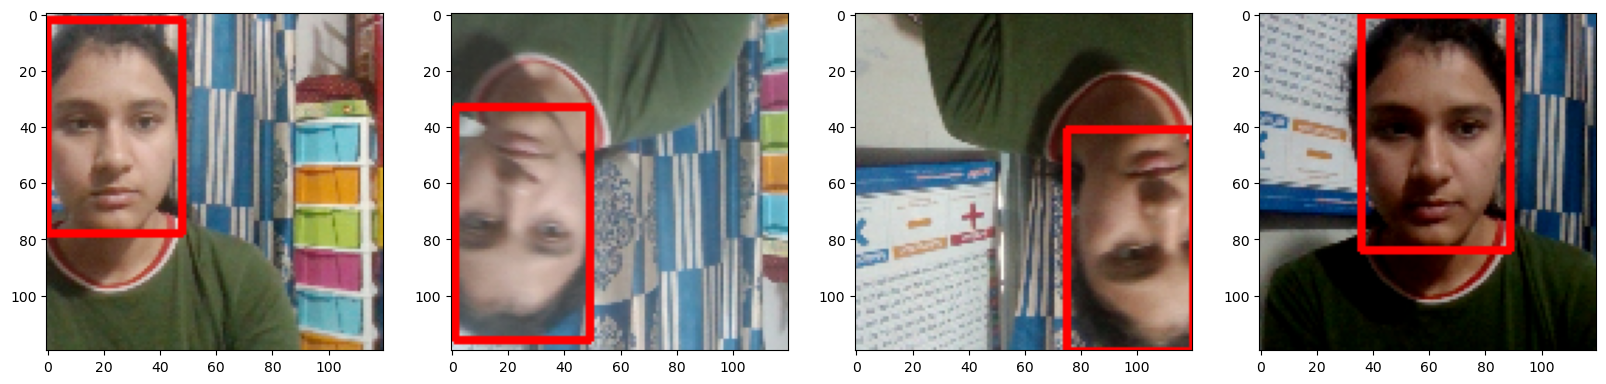

In [68]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(ncols=4, figsize=(20, 20))
for idx in range(4): 
    sample_image = res[0][idx]
    sample_coords = res[1][1][idx]
    
    # Convert image to uint8
    sample_image_uint8 = (sample_image * 255).astype('uint8')
    
    # Draw rectangle on the image
    cv2.rectangle(sample_image_uint8, 
                  tuple(np.multiply(sample_coords[:2], [120, 120]).astype(int)),
                  tuple(np.multiply(sample_coords[2:], [120, 120]).astype(int)), 
                  (255, 0, 0), 2)

    ax[idx].imshow(sample_image_uint8)


# 8. Build Deep Learning using the Functional API

### 8.1 Import Layers and Base Network

In [69]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv2D, Dense, GlobalMaxPooling2D
from tensorflow.keras.applications import VGG16

### 8.2 Download VGG16

In [70]:
vgg = VGG16(include_top=False)

In [71]:
vgg.summary()

Model: "vgg16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, None, None, 3)       │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv1 (Conv2D)                │ (None, None, None, 64)      │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv2 (Conv2D)                │ (None, None, None, 64)      │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_pool (MaxPooling2D)           │ (None, None, None, 64)      │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv1 (Conv2D)                │ (None, None, None, 128)     │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv2 (Conv2D)                │ (None, None, None, 128)     │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_pool (MaxPooling2D)           │ (None, None, None, 128)     │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv1 (Conv2D)                │ (None, None, None, 256)     │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv2 (Conv2D)                │ (None, None, None, 256)     │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv3 (Conv2D)                │ (None, None, None, 256)     │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_pool (MaxPooling2D)           │ (None, None, None, 256)     │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv1 (Conv2D)                │ (None, None, None, 512)     │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv2 (Conv2D)                │ (None, None, None, 512)     │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv3 (Conv2D)                │ (None, None, None, 512)     │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_pool (MaxPooling2D)           │ (None, None, None, 512)     │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv1 (Conv2D)                │ (None, None, None, 512)     │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv2 (Conv2D)                │ (None, None, None, 512)     │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv3 (Conv2D)                │ (None, None, None, 512)     │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_pool (MaxPooling2D)           │ (None, None, None, 512)     │               0 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 14,714,688 (56.13 MB)

 Trainable params: 14,714,688 (56.13 MB)

 Non-trainable params: 0 (0.00 B)

### 8.3 Build instance of Network

In [72]:
def build_model(): 
    input_layer = Input(shape=(120,120,3))
    
    vgg = VGG16(include_top=False)(input_layer)

    # Classification Model  
    f1 = GlobalMaxPooling2D()(vgg)
    class1 = Dense(2048, activation='relu')(f1)
    class2 = Dense(1, activation='sigmoid')(class1)
    
    # Bounding box model
    f2 = GlobalMaxPooling2D()(vgg)
    regress1 = Dense(2048, activation='relu')(f2)
    regress2 = Dense(4, activation='sigmoid')(regress1)
    
    facetracker = Model(inputs=input_layer, outputs=[class2, regress2])
    return facetracker

### 8.4 Test out Neural Network

In [73]:
facetracker = build_model()

In [74]:
facetracker.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                  ┃ Output Shape              ┃         Param # ┃ Connected to               ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)    │ (None, 120, 120, 3)       │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ vgg16 (Functional)            │ (None, 3, 3, 512)         │      14,714,688 │ input_layer_1[0][0]        │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ global_max_pooling2d          │ (None, 512)               │               0 │ vgg16[0][0]                │
│ (GlobalMaxPooling2D)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ global_max_pooling2d_1        │ (None, 512)               │               0 │ vgg16[0][0]                │
│ (GlobalMaxPooling2D)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ dense (Dense)                 │ (None, 2048)              │       1,050,624 │ global_max_pooling2d[0][0] │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ dense_2 (Dense)               │ (None, 2048)              │       1,050,624 │ global_max_pooling2d_1[0]… │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ dense_1 (Dense)               │ (None, 1)                 │           2,049 │ dense[0][0]                │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ dense_3 (Dense)               │ (None, 4)                 │           8,196 │ dense_2[0][0]              │
└───────────────────────────────┴───────────────────────────┴─────────────────┴────────────────────────────┘

 Total params: 16,826,181 (64.19 MB)

 Trainable params: 16,826,181 (64.19 MB)

 Non-trainable params: 0 (0.00 B)

In [75]:
X, y = train.as_numpy_iterator().next()

In [76]:
X.shape

(8, 120, 120, 3)

In [77]:
classes, coords = facetracker.predict(X)

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


In [78]:
classes, coords

(array([[0.21352494],
        [0.29314795],
        [0.30236155],
        [0.32746887],
        [0.31238216],
        [0.20989634],
        [0.28287104],
        [0.27234215]], dtype=float32),
 array([[0.38650435, 0.60948   , 0.71422905, 0.6184129 ],
        [0.3219256 , 0.60242915, 0.69046664, 0.6924246 ],
        [0.36817038, 0.5201155 , 0.7360432 , 0.5626051 ],
        [0.35759073, 0.49345228, 0.76408595, 0.6189768 ],
        [0.39796108, 0.5835347 , 0.61931413, 0.5940149 ],
        [0.40127426, 0.5346769 , 0.64109683, 0.655089  ],
        [0.42672783, 0.4734037 , 0.7283529 , 0.60900563],
        [0.29218146, 0.6293217 , 0.7043877 , 0.721369  ]], dtype=float32))

# 9. Define Losses and Optimizers

### 9.1 Define Optimizer and LR

In [79]:
batches_per_epoch = len(train)
lr_decay = (1./0.75 -1)/batches_per_epoch

In [80]:
opt = tf.keras.optimizers.Adam(learning_rate=0.0001, decay=lr_decay)

C:\Users\Hp\anaconda3\Lib\site-packages\keras\src\optimizers\base_optimizer.py:34: UserWarning: Argument `decay` is no longer supported and will be ignored.
  warnings.warn(


### 9.2 Create Localization Loss and Classification Loss

In [81]:
def localization_loss(y_true, yhat):            
    delta_coord = tf.reduce_sum(tf.square(y_true[:,:2] - yhat[:,:2]))
                  
    h_true = y_true[:,3] - y_true[:,1] 
    w_true = y_true[:,2] - y_true[:,0] 

    h_pred = yhat[:,3] - yhat[:,1] 
    w_pred = yhat[:,2] - yhat[:,0] 
    
    delta_size = tf.reduce_sum(tf.square(w_true - w_pred) + tf.square(h_true-h_pred))
    
    return delta_coord + delta_size

In [82]:
classloss = tf.keras.losses.BinaryCrossentropy()
regressloss = localization_loss

### 9.3 Test out Loss Metrics

In [83]:
localization_loss(y[1], coords)

<tf.Tensor: shape=(), dtype=float32, numpy=5.4734383>

In [84]:
classloss(y[0], classes)

<tf.Tensor: shape=(), dtype=float32, numpy=1.296463>

In [85]:
regressloss(y[1], coords)

<tf.Tensor: shape=(), dtype=float32, numpy=5.4734383>

# 10. Train Neural Network

### 10.1 Create Custom Model Class

In [86]:
class FaceTracker(Model): 
    def __init__(self, eyetracker,  **kwargs): 
        super().__init__(**kwargs)
        self.model = eyetracker

    def compile(self, opt, classloss, localizationloss, **kwargs):
        super().compile(**kwargs)
        self.closs = classloss
        self.lloss = localizationloss
        self.opt = opt
    
    def train_step(self, batch, **kwargs): 
        
        X, y = batch
        
        with tf.GradientTape() as tape: 
            classes, coords = self.model(X, training=True)
            
            batch_classloss = self.closs(y[0], classes)
            batch_localizationloss = self.lloss(tf.cast(y[1], tf.float32), coords)
            
            total_loss = batch_localizationloss+0.5*batch_classloss
            
            grad = tape.gradient(total_loss, self.model.trainable_variables)
        
        opt.apply_gradients(zip(grad, self.model.trainable_variables))
        
        return {"total_loss":total_loss, "class_loss":batch_classloss, "regress_loss":batch_localizationloss}
    
    def test_step(self, batch, **kwargs): 
        X, y = batch
        
        classes, coords = self.model(X, training=False)
        
        batch_classloss = self.closs(y[0], classes)
        batch_localizationloss = self.lloss(tf.cast(y[1], tf.float32), coords)
        total_loss = batch_localizationloss+0.5*batch_classloss
        
        return {"total_loss":total_loss, "class_loss":batch_classloss, "regress_loss":batch_localizationloss}
        
    def call(self, X, **kwargs): 
        return self.model(X, **kwargs)

In [87]:
class FaceTracker(Model): 
    def __init__(self, eyetracker, **kwargs): 
        super().__init__(**kwargs)
        self.model = eyetracker

    def compile(self, optimizer, class_loss, regression_loss, **kwargs):
        super().compile(**kwargs)
        self.opt = optimizer
        self.class_loss = class_loss
        self.regression_loss = regression_loss
    
    # Other methods...

    
    def train_step(self, batch, **kwargs): 
        X, y = batch
        
        with tf.GradientTape() as tape: 
            classes, coords = self.model(X, training=True)
            
            # Compute classification loss
            class_loss = tf.keras.losses.CategoricalCrossentropy()(y[0], classes)
            
            # Compute localization loss
            localization_loss = tf.reduce_mean(tf.square(y[1] - coords))
            
            # Total loss
            total_loss = localization_loss + 0.5 * class_loss
            
            # Compute gradients
            gradients = tape.gradient(total_loss, self.model.trainable_variables)
        
        # Apply gradients
        self.opt.apply_gradients(zip(gradients, self.model.trainable_variables))
        
        return {"total_loss": total_loss, "class_loss": class_loss, "regress_loss": localization_loss}
    
    def test_step(self, batch, **kwargs): 
        X, y = batch
        
        classes, coords = self.model(X, training=False)
        
        # Compute classification loss
        class_loss = tf.keras.losses.CategoricalCrossentropy()(y[0], classes)
        
        # Compute localization loss
        localization_loss = tf.reduce_mean(tf.square(y[1] - coords))
        
        # Total loss
        total_loss = localization_loss + 0.5 * class_loss
        
        return {"total_loss": total_loss, "class_loss": class_loss, "regress_loss": localization_loss}
        
    def call(self, X, **kwargs): 
        return self.model(X, **kwargs)


In [88]:
model = FaceTracker(facetracker)

In [89]:
model.compile(opt, classloss, regressloss)

### 10.2 Train

In [90]:
logdir='logs'

In [91]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [92]:
import numpy as np

# Check the range of values in y[0]
y0_min = np.min(y[0])
y0_max = np.max(y[0])

print("Range of values in y[0]:", y0_min, "to", y0_max)

# Check the range of values in classes
classes_min = np.min(classes)
classes_max = np.max(classes)

print("Range of values in classes:", classes_min, "to", classes_max)


Range of values in y[0]: 1 to 1
Range of values in classes: 0.20989634 to 0.32746887


In [96]:
from tensorflow.keras.callbacks import History

# Initialize History object to store loss values
history = History()

# Initialize lists to store loss values
total_losses = []
class_losses = []
regress_losses = []
val_total_losses = []
val_class_losses = []
val_regress_losses = []
epochs=10

# Training loop
for epoch in range(epochs):
    print(f"Epoch {epoch+1}/{epochs}")
    
    # Initialize loss metrics
    epoch_loss = tf.keras.metrics.Mean()
    epoch_class_loss = tf.keras.metrics.Mean()
    epoch_regress_loss = tf.keras.metrics.Mean()
    val_epoch_loss = tf.keras.metrics.Mean()
    val_epoch_class_loss = tf.keras.metrics.Mean()
    val_epoch_regress_loss = tf.keras.metrics.Mean()
    
    # Training phase
    for batch_idx, batch in enumerate(train):
        # Extract features (X) and labels (y) from the batch
        X, y = batch
        
        # Compute gradients within the tape
        with tf.GradientTape() as tape:
            # Forward pass: compute predicted classes and coordinates
            classes, coords = model(X, training=True)
            
            # Compute total loss
            batch_class_loss = classloss(y[0], classes)
            batch_localization_loss = regressloss(tf.cast(y[1], tf.float32), coords)
            total_loss = batch_localization_loss + 0.5 * batch_class_loss
            
            # Update epoch loss
            epoch_loss.update_state(total_loss)
            epoch_class_loss.update_state(batch_class_loss)
            epoch_regress_loss.update_state(batch_localization_loss)
        
        # Compute gradients
        gradients = tape.gradient(total_loss, model.trainable_variables)
        
        
        # Define and initialize the optimizer
        optimizer = tf.keras.optimizers.Adam(learning_rate=0.0001, decay=lr_decay)

        
        # Update model parameters
        optimizer.apply_gradients(zip(gradients, model.trainable_variables))
        
        # Append loss values to lists
        total_losses.append(total_loss.numpy())
        class_losses.append(batch_class_loss.numpy())
        regress_losses.append(batch_localization_loss.numpy())
        
        # Print batch index and loss values
        print(f"\rBatch {batch_idx+1}/{len(train)}, Loss: {total_loss.numpy()}, Class Loss: {batch_class_loss.numpy()}, Regress Loss: {batch_localization_loss.numpy()}", end='', flush=True)
    
    # Validation phase
    for val_batch_idx, val_batch in enumerate(val):
        # Extract features (X) and labels (y) from the batch
        val_X, val_y = val_batch
        
        # Forward pass: compute predicted classes and coordinates
        val_classes, val_coords = model(val_X, training=False)
        
        # Compute total loss
        val_batch_class_loss = classloss(val_y[0], val_classes)
        val_batch_localization_loss = regressloss(tf.cast(val_y[1], tf.float32), val_coords)
        val_total_loss = val_batch_localization_loss + 0.5 * val_batch_class_loss
        
        # Update validation epoch loss
        val_epoch_loss.update_state(val_total_loss)
        val_epoch_class_loss.update_state(val_batch_class_loss)
        val_epoch_regress_loss.update_state(val_batch_localization_loss)
        
        # Append validation loss values to lists
        val_total_losses.append(val_total_loss.numpy())
        val_class_losses.append(val_batch_class_loss.numpy())
        val_regress_losses.append(val_batch_localization_loss.numpy())
    
    # Compute average epoch loss for training and validation
    mean_loss = epoch_loss.result()
    mean_class_loss = epoch_class_loss.result()
    mean_regress_loss = epoch_regress_loss.result()
    mean_val_loss = val_epoch_loss.result()
    mean_val_class_loss = val_epoch_class_loss.result() 
    mean_val_regress_loss = val_epoch_regress_loss.result()
    
    # Print newline to move to the next line
    print()
    
    # Print epoch loss for training and validation
    print(f"Epoch {epoch+1}/{epochs}, Mean Loss: {mean_loss}, Mean Class Loss: {mean_class_loss}, Mean Regress Loss: {mean_regress_loss}")
    print(f"Epoch {epoch+1}/{epochs}, Mean Validation Loss: {mean_val_loss}, Mean Validation Class Loss: {mean_val_class_loss}, Mean Validation Regress Loss: {mean_val_regress_loss}")

# Create History object
history.history = {'loss': total_losses, 'class_loss': class_losses, 'regress_loss': regress_losses,
                   'val_loss': val_total_losses, 'val_class_loss': val_class_losses, 'val_regress_loss': val_regress_losses}

# Assign the History object to hist variable
hist = history

Epoch 1/10
Batch 398/398, Loss: 0.02785716950893402, Class Loss: 2.4496278001606697e-06, Regress Loss: 0.027855943888425827
Epoch 1/10, Mean Loss: 0.5946325659751892, Mean Class Loss: 0.1728726476430893, Mean Regress Loss: 0.5081958174705505
Epoch 1/10, Mean Validation Loss: 0.501234233379364, Mean Validation Class Loss: 0.0003436830302234739, Mean Validation Regress Loss: 0.5010623931884766
Epoch 2/10
Batch 398/398, Loss: 0.08524207770824432, Class Loss: 8.299131764033518e-07, Regress Loss: 0.0852416604757309264
Epoch 2/10, Mean Loss: 0.3668995797634125, Mean Class Loss: 0.1124558299779892, Mean Regress Loss: 0.3106716573238373
Epoch 2/10, Mean Validation Loss: 0.685438334941864, Mean Validation Class Loss: 0.0006380242411978543, Mean Validation Regress Loss: 0.6851192712783813
Epoch 3/10
Batch 398/398, Loss: 1.4638564586639404, Class Loss: 0.7239657640457153, Regress Loss: 1.1018736362457275175919
Epoch 3/10, Mean Loss: 0.3831552565097809, Mean Class Loss: 0.10389482975006104, Mean R

### 10.3 Plot Performance

In [97]:
hist.history

{'loss': [4.308544,
  1.3467124,
  3.262359,
  1.3977071,
  1.755591,
  3.4320607,
  1.2150283,
  3.0653794,
  3.0291603,
  1.3620837,
  1.3945937,
  0.93073934,
  1.2315874,
  1.5207703,
  3.151494,
  1.6307244,
  1.4256856,
  0.99490935,
  0.8763934,
  1.3038065,
  1.4151087,
  1.0203972,
  1.1168348,
  1.5321972,
  0.53056246,
  1.6442957,
  0.5440186,
  0.6991825,
  0.70234036,
  0.49835277,
  1.6253195,
  1.0039777,
  1.66755,
  1.1087183,
  0.4505179,
  2.0820742,
  0.8732552,
  0.7032923,
  0.60301137,
  0.5834111,
  0.82655954,
  0.42371795,
  1.6164722,
  1.0011399,
  0.5745577,
  0.48861203,
  1.4017708,
  0.5669076,
  0.69041693,
  1.2241638,
  0.7787518,
  0.4174259,
  1.0891954,
  0.41135427,
  0.4933353,
  0.30521756,
  0.4470545,
  0.38214457,
  0.88380337,
  0.59932,
  3.4201837,
  0.26280499,
  0.4481027,
  0.8410455,
  0.7416802,
  0.5771243,
  0.28214306,
  0.93412924,
  0.13813446,
  0.78624,
  0.41385326,
  0.26833794,
  0.18541776,
  0.37183186,
  0.58485025,
  0.

dict_keys(['loss', 'class_loss', 'regress_loss', 'val_loss', 'val_class_loss', 'val_regress_loss'])


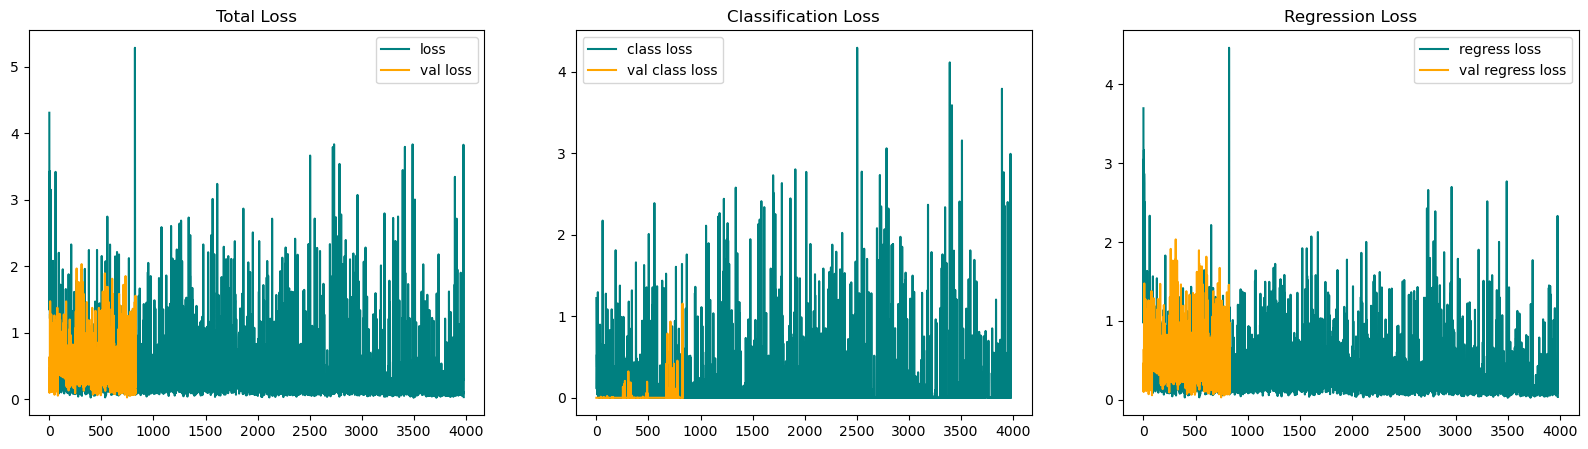

In [145]:
# Print available keys in the history object
print(hist.history.keys())

# Plotting the training and validation losses
fig, ax = plt.subplots(ncols=3, figsize=(20,5))

# Plot total loss
if 'loss' in hist.history:
    ax[0].plot(hist.history['loss'], color='teal', label='loss')
if 'val_loss' in hist.history:
    ax[0].plot(hist.history['val_loss'], color='orange', label='val loss')
ax[0].title.set_text('Total Loss')
ax[0].legend()

# Plot classification loss
if 'class_loss' in hist.history:
    ax[1].plot(hist.history['class_loss'], color='teal', label='class loss')
if 'val_class_loss' in hist.history:
    ax[1].plot(hist.history['val_class_loss'], color='orange', label='val class loss')
ax[1].title.set_text('Classification Loss')
ax[1].legend()

# Plot regression loss
if 'regress_loss' in hist.history:
    ax[2].plot(hist.history['regress_loss'], color='teal', label='regress loss')
if 'val_regress_loss' in hist.history:
    ax[2].plot(hist.history['val_regress_loss'], color='orange', label='val regress loss')
ax[2].title.set_text('Regression Loss')
ax[2].legend()

plt.show()


# 11. Make Predictions

### 11.1 Make Predictions on Test Set

In [146]:
test_data = test.as_numpy_iterator()

In [147]:
test_sample = test_data.next()

In [148]:
yhat = facetracker.predict(test_sample[0])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 363ms/step


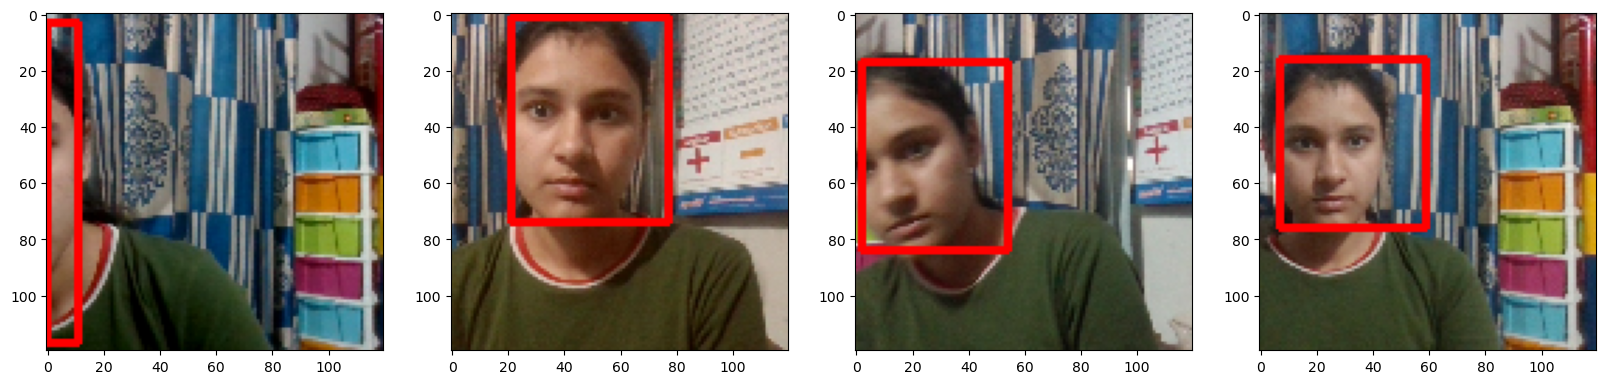

In [168]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx in range(4): 
    sample_image = test_sample[0][idx]
    sample_coords = yhat[1][idx]
    
    if yhat[0][idx] > 0.9:
        # Convert sample_image to a cv::UMat object
        sample_image_cv = cv2.UMat(sample_image)
        
        coords_int = tuple(np.multiply(sample_coords, [120, 120, 120, 120]).astype(int))
        
        # Draw rectangle on the cv::UMat object
        cv2.rectangle(sample_image_cv, coords_int[:2], coords_int[2:], (255, 0, 0), 2)
    
    # Convert the cv::UMat object back to a NumPy array
    sample_image_with_rect = sample_image_cv.get()
    
    ax[idx].imshow(sample_image_with_rect)


### 11.2 Real Time Detection

Encoding Complete
Recognized: KSHITIJ
Recognized: VAISHNAVI
Speed: 1.13 fps, Accuracy: 100.00%, Efficiency: 112.86
Recognized: KSHITIJ
Speed: 1.50 fps, Accuracy: 75.00%, Efficiency: 112.63
Recognized: KSHITIJ
Recognized: VAISHNAVI
Speed: 1.63 fps, Accuracy: 83.33%, Efficiency: 135.64
Recognized: KSHITIJ
Recognized: VAISHNAVI
Speed: 1.63 fps, Accuracy: 87.50%, Efficiency: 142.66
Recognized: VAISHNAVI
Speed: 3.28 fps, Accuracy: 88.89%, Efficiency: 291.51
Recognized: VAISHNAVI
Speed: 1.67 fps, Accuracy: 81.82%, Efficiency: 136.38
Recognized: VAISHNAVI
Recognized: JAISHNAVI
Speed: 1.58 fps, Accuracy: 84.62%, Efficiency: 133.96
Recognized: VAISHNAVI
Recognized: JAISHNAVI
Speed: 1.63 fps, Accuracy: 86.67%, Efficiency: 141.39
Recognized: VAISHNAVI
Recognized: JAISHNAVI
Speed: 1.65 fps, Accuracy: 88.24%, Efficiency: 145.40
Recognized: VAISHNAVI
Speed: 1.63 fps, Accuracy: 84.21%, Efficiency: 136.88
Recognized: VAISHNAVI
Speed: 3.22 fps, Accuracy: 85.00%, Efficiency: 273.77
Recognized: VAISHNAVI

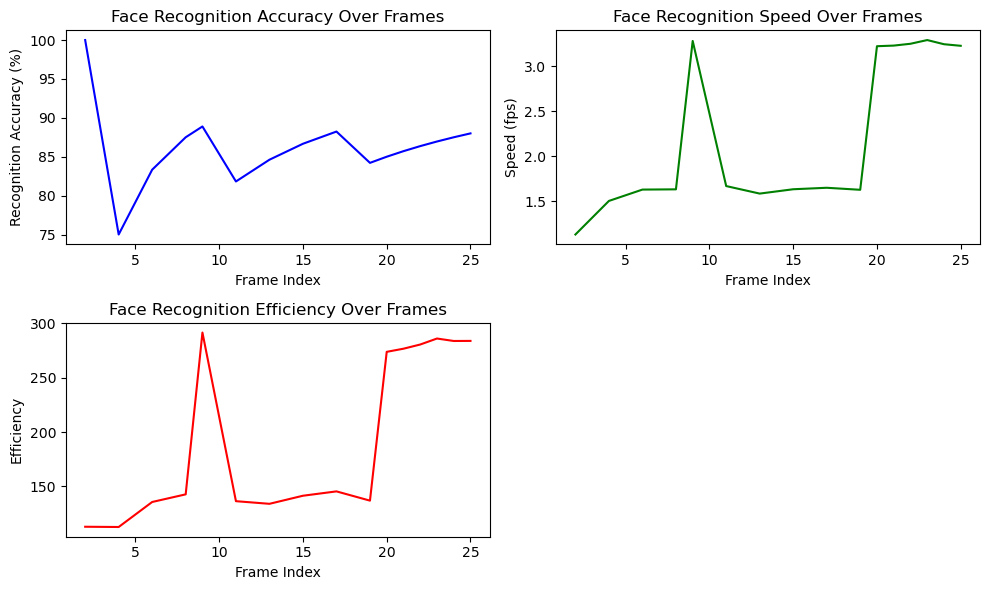

In [187]:
import cv2
import numpy as np
import face_recognition
import os
import time
import matplotlib.pyplot as plt

# Path to the dataset directory
path = r'C:\Users\Hp\Final DTM Project\dataset'

# Load images and their corresponding names from the dataset directory
def load_dataset(path):
    images = []
    classNames = []
    for cl in os.listdir(path):
        img_path = os.path.join(path, cl)
        if os.path.isfile(img_path):
            img = cv2.imread(img_path)
            if img is not None:
                images.append(img)
                classNames.append(os.path.splitext(cl)[0])
            else:
                print(f"Error: Unable to read image {img_path}")
    return images, classNames

# Function to encode faces in the dataset
def encode_faces(images):
    encodeList = []
    for img in images:
        img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        faces = face_recognition.face_locations(img_rgb)
        if faces:
            encode = face_recognition.face_encodings(img_rgb, faces)[0]
            encodeList.append(encode)
    return encodeList

# Function to mark attendance by displaying the name on the frame
def detectCriminal(name, frame, x1, y1, x2, y2):
    cv2.rectangle(frame, (x1, y1), (x2, y2), (0, 255, 0), 2)
    cv2.rectangle(frame, (x1, y2 - 35), (x2, y2), (0, 255, 0), cv2.FILLED)
    cv2.putText(frame, name, (x1 + 6, y2 - 6), cv2.FONT_HERSHEY_COMPLEX, 1, (255, 255, 255), 2)

# Load dataset
images, classNames = load_dataset(path)
if len(images) == 0:
    print("No valid images found in the dataset directory.")
    exit()

# Encode faces in the dataset
encodeListKnown = encode_faces(images)
print('Encoding Complete')

# Confidence threshold for face recognition
confidence_threshold = 0.5

# Initialize video capture
cap = cv2.VideoCapture(0)

# Initialize variables to count correctly recognized faces and total detected faces
correct_count = 0
total_count = 0

# Initialize lists to store accuracy, speed, and efficiency values
accuracy_values = []
speed_values = []
efficiency_values = []
frame_indices = []

# Initialize variables to measure time
start_time = 0
end_time = 0

while True:
    success, img = cap.read()

    if not success:
        continue  # Skip the iteration if the frame is not successfully retrieved

    # Measure the start time of frame processing
    start_time = time.time()

    imgS = cv2.resize(img, (0, 0), fx=0.25, fy=0.25)
    imgS = cv2.cvtColor(imgS, cv2.COLOR_BGR2RGB)

    # Find face locations and encodings in the current frame
    facesCurFrame = face_recognition.face_locations(imgS)
    encodesCurFrame = face_recognition.face_encodings(imgS, facesCurFrame)

    for encodeFace, faceLoc in zip(encodesCurFrame, facesCurFrame):
        # Increment the total count of detected faces
        total_count += 1

        # Compare face encodings with known encodings
        matches = face_recognition.compare_faces(encodeListKnown, encodeFace, tolerance=0.6)
        faceDistances = face_recognition.face_distance(encodeListKnown, encodeFace)

        # Identify the best match
        matchIndex = np.argmin(faceDistances)

        if matches[matchIndex] and faceDistances[matchIndex] <= confidence_threshold:
            name = classNames[matchIndex].upper()
            y1, x2, y2, x1 = faceLoc
            y1, x2, y2, x1 = y1 * 4, x2 * 4, y2 * 4, x1 * 4
            detectCriminal(name, img, x1, y1, x2, y2)

            # Increment the correct count if the face is correctly recognized
            correct_count += 1

            # Print the recognized name for debugging
            print(f"Recognized: {name}")

    # Measure the end time of frame processing
    end_time = time.time()

    # Calculate frame processing speed in frames per second (fps)
    speed = 1 / (end_time - start_time)

    # Calculate recognition accuracy
    if total_count > 0:
        accuracy = (correct_count / total_count) * 100
    else:
        accuracy = 0.0

    # Calculate recognition efficiency as the product of speed and accuracy
    efficiency = speed * accuracy

    # Append the values to the respective lists
    accuracy_values.append(accuracy)
    speed_values.append(speed)
    efficiency_values.append(efficiency)
    frame_indices.append(total_count)

    # Print efficiency for debugging
    print(f"Speed: {speed:.2f} fps, Accuracy: {accuracy:.2f}%, Efficiency: {efficiency:.2f}")

    cv2.imshow('Webcam', img)
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# Release video capture and close all windows
cap.release()
cv2.destroyAllWindows()

# Plotting the graphs
plt.figure(figsize=(10, 6))

# Plot accuracy graph
plt.subplot(2, 2, 1)
plt.plot(frame_indices, accuracy_values, color='blue')
plt.xlabel('Frame Index')
plt.ylabel('Recognition Accuracy (%)')
plt.title('Face Recognition Accuracy Over Frames')

# Plot speed graph
plt.subplot(2, 2, 2)
plt.plot(frame_indices, speed_values, color='green')
plt.xlabel('Frame Index')
plt.ylabel('Speed (fps)')
plt.title('Face Recognition Speed Over Frames')

# Plot efficiency graph
plt.subplot(2, 2, 3)
plt.plot(frame_indices, efficiency_values, color='red')
plt.xlabel('Frame Index')
plt.ylabel('Efficiency')
plt.title('Face Recognition Efficiency Over Frames')

plt.tight_layout()
plt.show()
